# Importing the necessary libraries

In [164]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', None)

# Understanding the Data

In [210]:
bch = pd.read_csv('BCH-USD.csv')
bnb = pd.read_csv('BNB-USD.csv')
btc = pd.read_csv('BTC-USD.csv')
eth = pd.read_csv('ETH-USD.csv')
iota = pd.read_csv('IOTA-USD.csv')
sol = pd.read_csv('SOL-USD.csv')
usdt = pd.read_csv('USDT-USD.csv')
xrp = pd.read_csv('XRP-USD.csv')

## 2023 Data

In [32]:
data2023 = pd.read_csv('coinmarketcap_12302023.csv')
data2023.head()

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,price,volume_24h,volume_change_24h,percent_change_1h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,market_cap,market_cap_dominance,fully_diluted_market_cap,tvl
0,0,1,Bitcoin,BTC,bitcoin,10689,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.0,1.958509e+07,1.958509e+07,False,NaN,1,NaN,NaN,NaN,2023-12-30T23:50:00.000Z,42207.073788,1.606997e+10,-38.1347,-0.062385,0.465763,-3.573192,11.855043,21.814387,50.905482,8.266295e+11,50.0284,8.863485e+11,NaN
1,1,1027,Ethereum,ETH,ethereum,8141,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,1.201827e+08,1.201827e+08,True,NaN,2,NaN,NaN,NaN,2023-12-30T23:50:00.000Z,2294.108367,6.891368e+09,-45.1644,-0.008768,-0.128512,-0.811726,11.665643,26.468024,32.257431,2.757122e+11,16.6864,2.757122e+11,NaN
2,2,825,Tether USDt,USDT,tether,70121,2015-02-25T00:00:00.000Z,"['payments', 'stablecoin', 'asset-backed-stabl...",NaN,9.167960e+10,9.460306e+10,True,"{'id': 1027, 'name': 'Ethereum', 'symbol': 'ET...",3,NaN,NaN,NaN,2023-12-30T23:50:00.000Z,1.000065,3.161673e+10,-39.7381,-0.005005,-0.050042,-0.040567,-0.007647,-0.033547,0.024425,9.168552e+10,5.5489,9.460916e+10,NaN
3,3,1839,BNB,BNB,bnb,1949,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,1.516924e+08,1.516924e+08,False,NaN,4,NaN,NaN,NaN,2023-12-30T23:50:00.000Z,317.953456,9.024301e+08,-36.2279,0.863151,1.449258,17.108815,39.628263,40.487962,45.804519,4.823112e+10,2.9190,4.823112e+10,NaN
4,4,5426,Solana,SOL,solana,563,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,4.292983e+08,5.660536e+08,True,NaN,5,NaN,NaN,NaN,2023-12-30T23:50:00.000Z,102.022203,1.863357e+09,-58.1235,-0.086814,-3.889154,-5.525125,72.349593,165.207883,324.911382,4.379796e+10,2.6507,5.775004e+10,NaN


In [33]:
data2023.describe()

,Unnamed: 0,id,num_market_pairs,max_supply,circulating_supply,total_supply,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,price,volume_24h,volume_change_24h,percent_change_1h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,market_cap,market_cap_dominance,fully_diluted_market_cap,tvl
count,5000.000000,5000.00000,5000.000000,3.623000e+03,5.000000e+03,5.000000e+03,5000.000000,3.044000e+03,3.044000e+03,8.300000e+01,5.000000e+03,5.000000e+03,5.000000e+03,5000.000000,5000.000000,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5000.000000,5.000000e+03,8.900000e+01
mean,2499.500000,15329.60380,60.093600,6.094000e+15,3.551923e+14,2.208862e+16,2500.500000,1.512039e+21,1.816612e+19,2.295633e+04,1.054058e+04,1.747884e+07,1.757058e+04,1.060553,15.925340,9.048708e+04,2.279578e+05,9.999512e+05,1.601701e+11,3.481960e+08,0.020021,1.460173e+12,6.123204e+08
std,1443.520003,8628.34529,1082.630626,1.063426e+17,1.444968e+16,1.238108e+18,1443.520003,7.893843e+22,1.002270e+21,2.081319e+05,7.296284e+05,5.158839e+08,9.766552e+05,66.906313,968.171420,4.917555e+06,1.406960e+07,6.827986e+07,1.132566e+13,1.245498e+10,0.753503,8.884158e+13,2.489361e+09
min,0.000000,1.00000,1.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,-2.500000e+07,-5.132885e+07,3.256640e-03,9.856460e-19,0.000000e+00,-1.000000e+02,-74.427102,-99.015671,-9.930312e+01,-9.992525e+01,-9.992525e+01,-9.999737e+01,0.000000e+00,0.000000,0.000000e+00,6.870570e+00
25%,1249.750000,8056.75000,4.000000,1.000000e+08,0.000000e+00,3.000000e+07,1250.750000,2.101695e+07,4.054696e+05,2.038792e-01,1.229903e-03,1.848690e+04,-3.051243e+01,-0.241149,-2.505204,-9.220357e+00,-6.631893e+00,-1.471395e+00,-3.908969e+00,0.000000e+00,0.000000,7.214980e+05,5.613589e+05
50%,2499.500000,14775.00000,9.000000,1.000000e+09,0.000000e+00,4.173600e+08,2500.500000,1.568270e+08,2.506440e+06,1.158836e+00,1.698886e-02,7.498073e+04,-3.692950e+00,-0.013161,-0.104011,-9.565131e-01,1.198218e+01,2.979402e+01,3.502697e+01,0.000000e+00,0.000000,6.221726e+06,9.277273e+06
75%,3749.250000,23225.50000,22.000000,5.000000e+09,1.055356e+08,2.367995e+09,3750.250000,1.444542e+09,1.496518e+07,5.355027e+00,2.466323e-01,4.633061e+05,1.244060e+01,0.332266,2.217615,7.989436e+00,4.579415e+01,9.574203e+01,1.099282e+02,3.161647e+06,0.000000,5.013502e+07,8.372097e+07
max,4999.000000,28895.00000,70121.000000,4.212250e+18,9.818468e+17,8.731273e+19,5000.000000,4.351688e+24,5.529768e+22,1.896269e+06,5.159077e+07,3.161673e+10,6.762750e+07,4715.679295,68342.884114,3.226544e+08,9.862350e+08,4.826327e+09,8.008449e+14,8.266295e+11,50.028400,6.202368e+15,2.127537e+10


In [34]:
data2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        5000 non-null   int64  
 1   id                                5000 non-null   int64  
 2   name                              5000 non-null   object 
 3   symbol                            5000 non-null   object 
 4   slug                              5000 non-null   object 
 5   num_market_pairs                  5000 non-null   int64  
 6   date_added                        5000 non-null   object 
 7   tags                              5000 non-null   object 
 8   max_supply                        3623 non-null   float64
 9   circulating_supply                5000 non-null   float64
 10  total_supply                      5000 non-null   float64
 11  infinite_supply                   5000 non-null   bool   
 12  platfo

In [35]:
#number of unique crypto currencies listed
len(data2023['id'].unique())

5000

## 2017 Data

In [47]:
data2017 = pd.read_csv('coinmarketcap_06122017.csv')
data2017.head()

,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,0,9.007640e+09,1.672352e+07,bitcoin,1512549554,2.130493e+11,2.100000e+07,Bitcoin,0.12,7.33,17.45,1.000000,12739.500000,1,BTC,1.672352e+07
1,1,1.551330e+09,9.616537e+07,ethereum,1512549553,4.352945e+10,NaN,Ethereum,-0.18,-3.93,-7.33,0.036177,452.652000,2,ETH,9.616537e+07
2,2,1.111350e+09,1.684044e+07,bitcoin-cash,1512549578,2.529585e+10,2.100000e+07,Bitcoin Cash,1.65,-5.51,-4.75,0.120050,1502.090000,3,BCH,1.684044e+07
3,3,2.936090e+09,2.779530e+09,iota,1512549571,1.475225e+10,2.779530e+09,IOTA,-2.38,83.35,255.82,0.000424,5.307460,4,MIOTA,2.779530e+09
4,4,2.315050e+08,3.873915e+10,ripple,1512549541,9.365343e+09,1.000000e+11,Ripple,0.56,-3.70,-14.79,0.000019,0.241754,5,XRP,9.999309e+10


In [48]:
data2017.describe()

,Unnamed: 0,24h_volume_usd,available_supply,last_updated,market_cap_usd,max_supply,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,total_supply
count,1326.000000,1.270000e+03,1.031000e+03,1.326000e+03,1.031000e+03,2.150000e+02,1273.000000,1270.000000,1283.000000,1.326000e+03,1.326000e+03,1326.000000,1.211000e+03
mean,662.500000,1.645593e+07,8.657165e+09,1.512545e+09,3.630503e+08,4.655418e+12,1.052435,8.655677,29.536539,3.397067e-02,4.252208e+02,663.500000,7.849645e+11
std,382.927539,2.740461e+08,1.140542e+11,3.793006e+04,6.844947e+09,6.819914e+13,12.005501,44.010749,121.155058,8.793567e-01,1.100295e+04,382.927539,2.650661e+13
min,0.000000,8.678570e-02,0.000000e+00,1.511626e+09,1.000000e+01,3.000000e+02,-70.850000,-95.850000,-99.590000,2.000000e-12,2.790000e-08,1.000000,1.000000e+00
25%,331.250000,3.200618e+02,5.012184e+06,1.512550e+09,1.880625e+05,2.150000e+07,-0.170000,-6.632500,-7.775000,3.700000e-07,4.629540e-03,332.250000,8.768462e+06
50%,662.500000,4.935380e+03,2.239625e+07,1.512550e+09,1.488564e+06,1.000000e+08,0.520000,1.820000,11.430000,3.905000e-06,4.886040e-02,663.500000,4.233708e+07
75%,993.750000,2.089422e+05,1.112813e+08,1.512550e+09,1.546756e+07,6.585774e+08,0.970000,11.662500,35.645000,3.712500e-05,4.615170e-01,994.750000,2.544898e+08
max,1325.000000,9.007640e+09,3.209033e+12,1.512550e+09,2.130493e+11,1.000000e+15,232.310000,833.010000,3360.710000,3.145070e+01,3.935200e+05,1326.000000,9.223424e+14


In [49]:
data2017.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1326 entries, 0 to 1325
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1326 non-null   int64  
 1   24h_volume_usd      1270 non-null   float64
 2   available_supply    1031 non-null   float64
 3   id                  1326 non-null   object 
 4   last_updated        1326 non-null   int64  
 5   market_cap_usd      1031 non-null   float64
 6   max_supply          215 non-null    float64
 7   name                1326 non-null   object 
 8   percent_change_1h   1273 non-null   float64
 9   percent_change_24h  1270 non-null   float64
 10  percent_change_7d   1283 non-null   float64
 11  price_btc           1326 non-null   float64
 12  price_usd           1326 non-null   float64
 13  rank                1326 non-null   int64  
 14  symbol              1326 non-null   object 
 15  total_supply        1211 non-null   float64
dtypes: flo

In [50]:
#number of unique crypto currencies listed
len(data2017['id'].unique())

1326

# Data Analysis

## Popular Tags described by the wordcloud

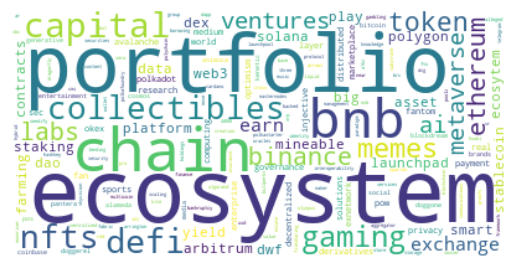

In [104]:
all_tags = ''
for tag in data2023['tags']:
    for t in tag.split(','):
        all_tags += t.strip('[').strip(']').strip('\'').strip(' \'') + ' '
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(all_tags)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Top 5 Crypto Currencies

In [70]:
data2023.sort_values(by = 'cmc_rank')[['cmc_rank','name', 'market_cap','date_added','total_supply','max_supply','price']].head()

,cmc_rank,name,market_cap,date_added,total_supply,max_supply,price
0,1,Bitcoin,8.266295e+11,2010-07-13T00:00:00.000Z,1.958509e+07,21000000.0,42207.073788
1,2,Ethereum,2.757122e+11,2015-08-07T00:00:00.000Z,1.201827e+08,NaN,2294.108367
2,3,Tether USDt,9.168552e+10,2015-02-25T00:00:00.000Z,9.460306e+10,NaN,1.000065
3,4,BNB,4.823112e+10,2017-07-25T00:00:00.000Z,1.516924e+08,NaN,317.953456
4,5,Solana,4.379796e+10,2020-04-10T00:00:00.000Z,5.660536e+08,NaN,102.022203


In [71]:
data2017.sort_values(by = 'rank')[['rank','name', 'market_cap_usd','total_supply','max_supply','price_usd']].head()

,rank,name,market_cap_usd,total_supply,max_supply,price_usd
0,1,Bitcoin,2.130493e+11,1.672352e+07,2.100000e+07,12739.500000
1,2,Ethereum,4.352945e+10,9.616537e+07,NaN,452.652000
2,3,Bitcoin Cash,2.529585e+10,1.684044e+07,2.100000e+07,1502.090000
3,4,IOTA,1.475225e+10,2.779530e+09,2.779530e+09,5.307460
4,5,Ripple,9.365343e+09,9.999309e+10,1.000000e+11,0.241754


Bitcoin and Ethereum have consistenty ranked at the top the chart. However Bitcoin has managed to gain significant market capital while Etherium has lost significant market capital

An interesting fact to notice is that Solana was launched in 2020 and it has already managed to gain a spot in the top 5 ranks 

## Analysing the number of Market Pairs

In [107]:
print(f'Minimum market pairs = {min(data2023.num_market_pairs)}\nMaximum market pairs = {max(data2023.num_market_pairs)}')

Minimum market pairs = 1
Maximum market pairs = 70121


In [130]:
ranges = {'(0, 250]':0,'(250, 500]':0,'(500, 1000]':0,'(1000, 2500]':0, '(2500, 5000]':0, '(5000, 10000]':0, '(10000, 20000]':0, '(20000, 80000]':0}
for i, r in enumerate(pd.cut(data2023.num_market_pairs, bins = [0, 250, 500,1000,2500,5000,10000,20000,80000])):
    ranges[str(r)]+=1
print(ranges)

{'(0, 250]': 4896, '(250, 500]': 59, '(500, 1000]': 26, '(1000, 2500]': 10, '(2500, 5000]': 2, '(5000, 10000]': 2, '(10000, 20000]': 4, '(20000, 80000]': 1}


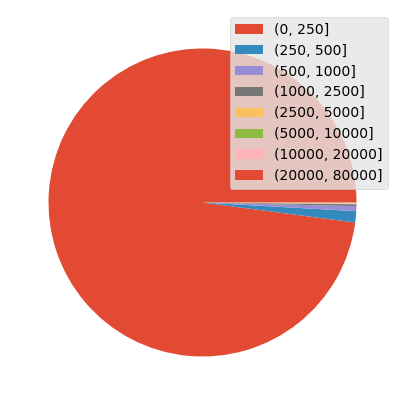

In [145]:
plt.figure(figsize=[5,5])
plt.pie(ranges.values())
plt.legend(ranges.keys(),loc='upper right')

In [154]:
print(f'Coin having the maximum number of market pairs\n{data2023[data2023["num_market_pairs"]==70121]["name"].iloc[0]}')

Coin having the maximum number of market pairs
Tether USDt


In [141]:
print(f'Number of coins having less than 10 market pairs\n{data2023[data2023["num_market_pairs"]<=10].count()["id"]}')

Number of coins having less than 10 market pairs
2680


From the above we can conclude that more than 90% of the coins have less than 1000 market pairs with more than 50% having less than 10 market pairs. Tether USDt has the highest number of market pairs witn 70121 pairs.

Text(0.5, 1.0, 'Distribution of the number of market pairs')

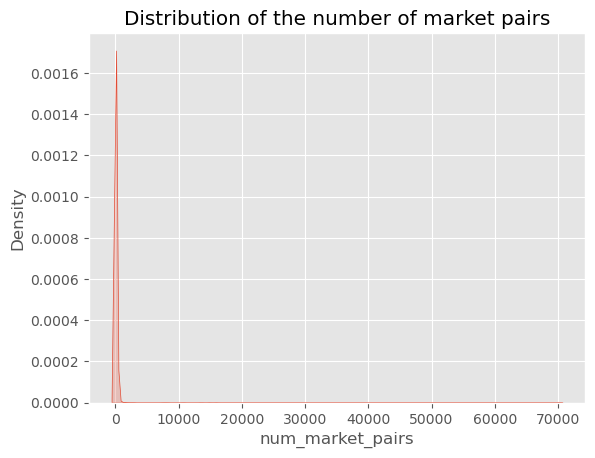

In [169]:
sns.kdeplot(data2023["num_market_pairs"], fill = True)
plt.title('Distribution of the number of market pairs')

## Analysing the Coin Prices

## 2023

In [156]:
print(f'Minimum price for a coin: {data2023[data2023["price"] == min(data2023["price"])]["name"].iloc[0]} -> {min(data2023["price"])}')

Minimum price for a coin: BNBTiger -> 9.85646e-19


In [157]:
data2023[data2023["price"] == min(data2023["price"])]

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,price,volume_24h,volume_change_24h,percent_change_1h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,market_cap,market_cap_dominance,fully_diluted_market_cap,tvl
4264,4264,17235,BNBTiger,BNBTIGER,bnbtiger,18,2022-01-13T08:26:34.000Z,[],NaN,0.0,0.0,False,"{'id': 1839, 'name': 'BNB Smart Chain (BEP20)'...",4265,4.351688e+24,4.289224e+06,NaN,2023-12-30T23:50:00.000Z,9.856460e-19,20719.985144,147.4907,0.576113,-0.439807,2.671449,5.983431,0.576113,82.52702,0.0,0.0,0.0,NaN


In [161]:
print(f'Maximum price for a coin: {data2023[data2023["price"] == max(data2023["price"])]["name"].iloc[0]} -> {max(data2023["price"])}')

Maximum price for a coin: SEX Odyssey -> 51590765.00619511


In [162]:
data2023[data2023["price"] == max(data2023["price"])]

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,price,volume_24h,volume_change_24h,percent_change_1h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,market_cap,market_cap_dominance,fully_diluted_market_cap,tvl
2359,2359,28566,SEX Odyssey,SEX,sex-one,4,2023-12-01T12:13:18.000Z,['memes'],1.0,0.0,1.0,False,"{'id': 11841, 'name': 'Arbitrum', 'symbol': 'A...",2360,1.0,5.159077e+07,NaN,2023-12-30T23:50:00.000Z,5.159077e+07,2.119986e+06,-9.9738,1.317959,-21.394892,-47.763362,-68.966247,-68.966247,-68.966247,0.0,0.0,51590765.01,NaN


In [163]:
data2023["price"].describe()

count    5.000000e+03
mean     1.054058e+04
std      7.296284e+05
min      9.856460e-19
25%      1.229903e-03
50%      1.698886e-02
75%      2.466323e-01
max      5.159077e+07
Name: price, dtype: float64

Text(0.5, 1.0, 'Distribution of Price')

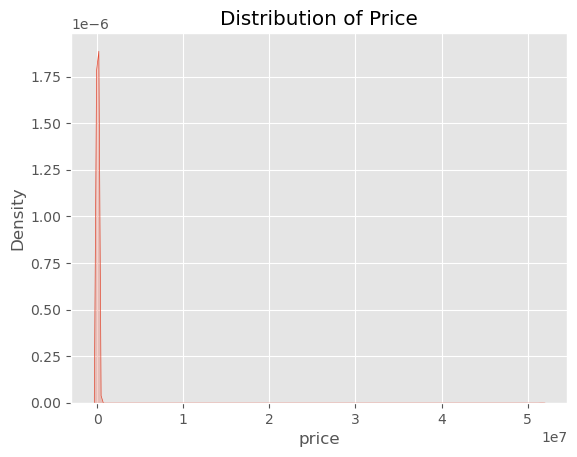

In [171]:
sns.kdeplot(data2023['price'], fill=True)
plt.title('Distribution of Price')

## 2017

In [174]:
print(f'Minimum price for a coin: {data2017[data2017["price_usd"] == min(data2017["price_usd"])]["name"].iloc[0]} -> {min(data2017["price_usd"])}')

Minimum price for a coin: StrongHands -> 2.79e-08


In [175]:
data2017[data2017["price_usd"] == min(data2017["price_usd"])]

,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
1151,1151,1435.23,NaN,stronghands,1512549551,NaN,NaN,StrongHands,-4.79,-3.37,-11.54,2.000000e-12,2.790000e-08,1152,SHND,1.239092e+10


In [176]:
print(f'Maximum price for a coin: {data2017[data2017["price_usd"] == max(data2017["price_usd"])]["name"].iloc[0]} -> {max(data2017["price_usd"])}')


Maximum price for a coin: Bit20 -> 393520.0


In [177]:
data2017[data2017["price_usd"] == max(data2017["price_usd"])]

,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
620,620,756.752,1.0,bit20,1512549572,399816.0,NaN,Bit20,3.52,4.17,NaN,31.4507,393520.0,621,BTWTY,1.0


In [178]:
data2017["price_usd"].describe()

count    1.326000e+03
mean     4.252208e+02
std      1.100295e+04
min      2.790000e-08
25%      4.629540e-03
50%      4.886040e-02
75%      4.615170e-01
max      3.935200e+05
Name: price_usd, dtype: float64

Text(0.5, 1.0, 'Distribution of Price')

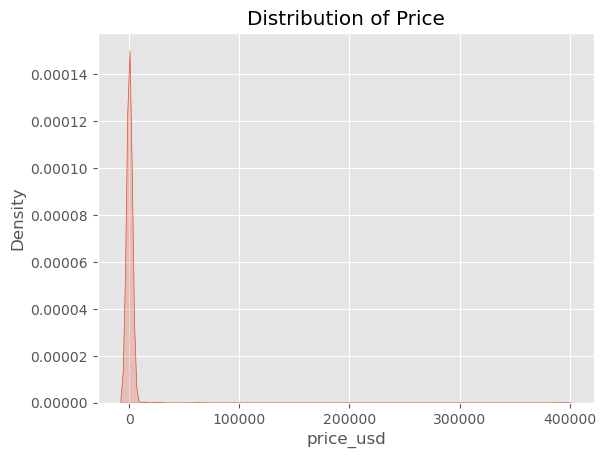

In [180]:
sns.kdeplot(data2017['price_usd'], fill=True)
plt.title('Distribution of Price')

## Analysing the Market Capital

## 2023

In [193]:
print(f'{data2023[data2023["market_cap"] == min(data2023["market_cap"])]["name"].count()} have minimum market capital = {min(data2023["market_cap"])}')


2763 have minimum market capital = 0.0


In [194]:
print(f'{data2023[data2023["market_cap"] == max(data2023["market_cap"])]["name"].count()} has maximum market capital = {max(data2023["market_cap"])}')


1 has maximum market capital = 826629465401.5385


In [186]:
data2023[data2023["market_cap"] == max(data2023["market_cap"])]

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,price,volume_24h,volume_change_24h,percent_change_1h,percent_change_24h,percent_change_7d,percent_change_30d,percent_change_60d,percent_change_90d,market_cap,market_cap_dominance,fully_diluted_market_cap,tvl
0,0,1,Bitcoin,BTC,bitcoin,10689,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.0,19585093.0,19585093.0,False,NaN,1,NaN,NaN,NaN,2023-12-30T23:50:00.000Z,42207.073788,1.606997e+10,-38.1347,-0.062385,0.465763,-3.573192,11.855043,21.814387,50.905482,8.266295e+11,50.0284,8.863485e+11,NaN


In [189]:
data2023["market_cap"].describe()

count    5.000000e+03
mean     3.481960e+08
std      1.245498e+10
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      3.161647e+06
max      8.266295e+11
Name: market_cap, dtype: float64

Text(0.5, 1.0, 'Distribution of the Market Capital')

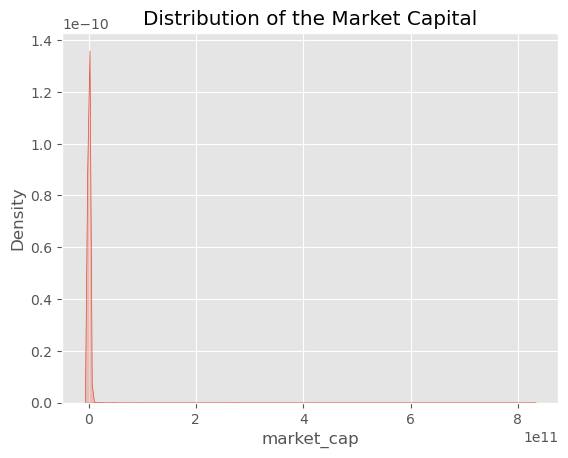

In [188]:
sns.kdeplot(data2023["market_cap"], fill=True)
plt.title('Distribution of the Market Capital')

## 2017

In [192]:
print(f'{data2017[data2017["market_cap_usd"] == min(data2017["market_cap_usd"])]["name"].count()} has minimum market capital = {min(data2017["market_cap_usd"])}')


1 has minimum market capital = 10.0


In [196]:
print(f'{data2017[data2017["market_cap_usd"] == max(data2017["market_cap_usd"])]["name"].count()} has maximum market capital = {max(data2017["market_cap_usd"])}')


1 has maximum market capital = 213049346738.0


In [198]:
data2017[data2017["market_cap_usd"] == max(data2017["market_cap_usd"])]

,Unnamed: 0,24h_volume_usd,available_supply,id,last_updated,market_cap_usd,max_supply,name,percent_change_1h,percent_change_24h,percent_change_7d,price_btc,price_usd,rank,symbol,total_supply
0,0,9.007640e+09,16723525.0,bitcoin,1512549554,2.130493e+11,21000000.0,Bitcoin,0.12,7.33,17.45,1.0,12739.5,1,BTC,16723525.0


In [200]:
data2017["market_cap_usd"].describe()

count    1.031000e+03
mean     3.630503e+08
std      6.844947e+09
min      1.000000e+01
25%      1.880625e+05
50%      1.488564e+06
75%      1.546756e+07
max      2.130493e+11
Name: market_cap_usd, dtype: float64

Text(0.5, 1.0, 'Distribution of the Market Capital')

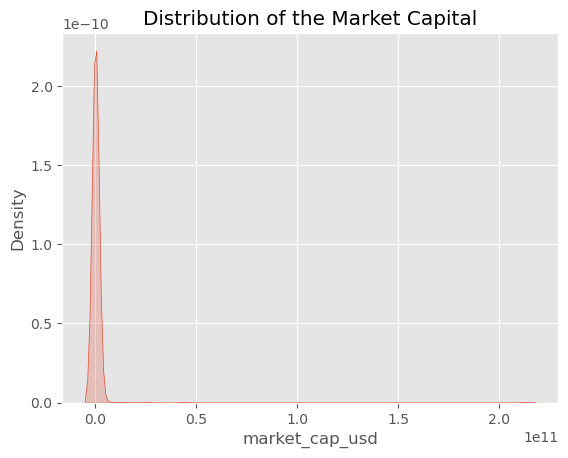

In [199]:
sns.kdeplot(data2017["market_cap_usd"], fill=True)
plt.title('Distribution of the Market Capital')

## Analysing the correlation between various fields

## 2023

/var/folders/xy/5yqd00h92792tkx0dp713klr0000gn/T/ipykernel_43878/3107515439.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data2023.corr(),annot = True)


<Axes: >

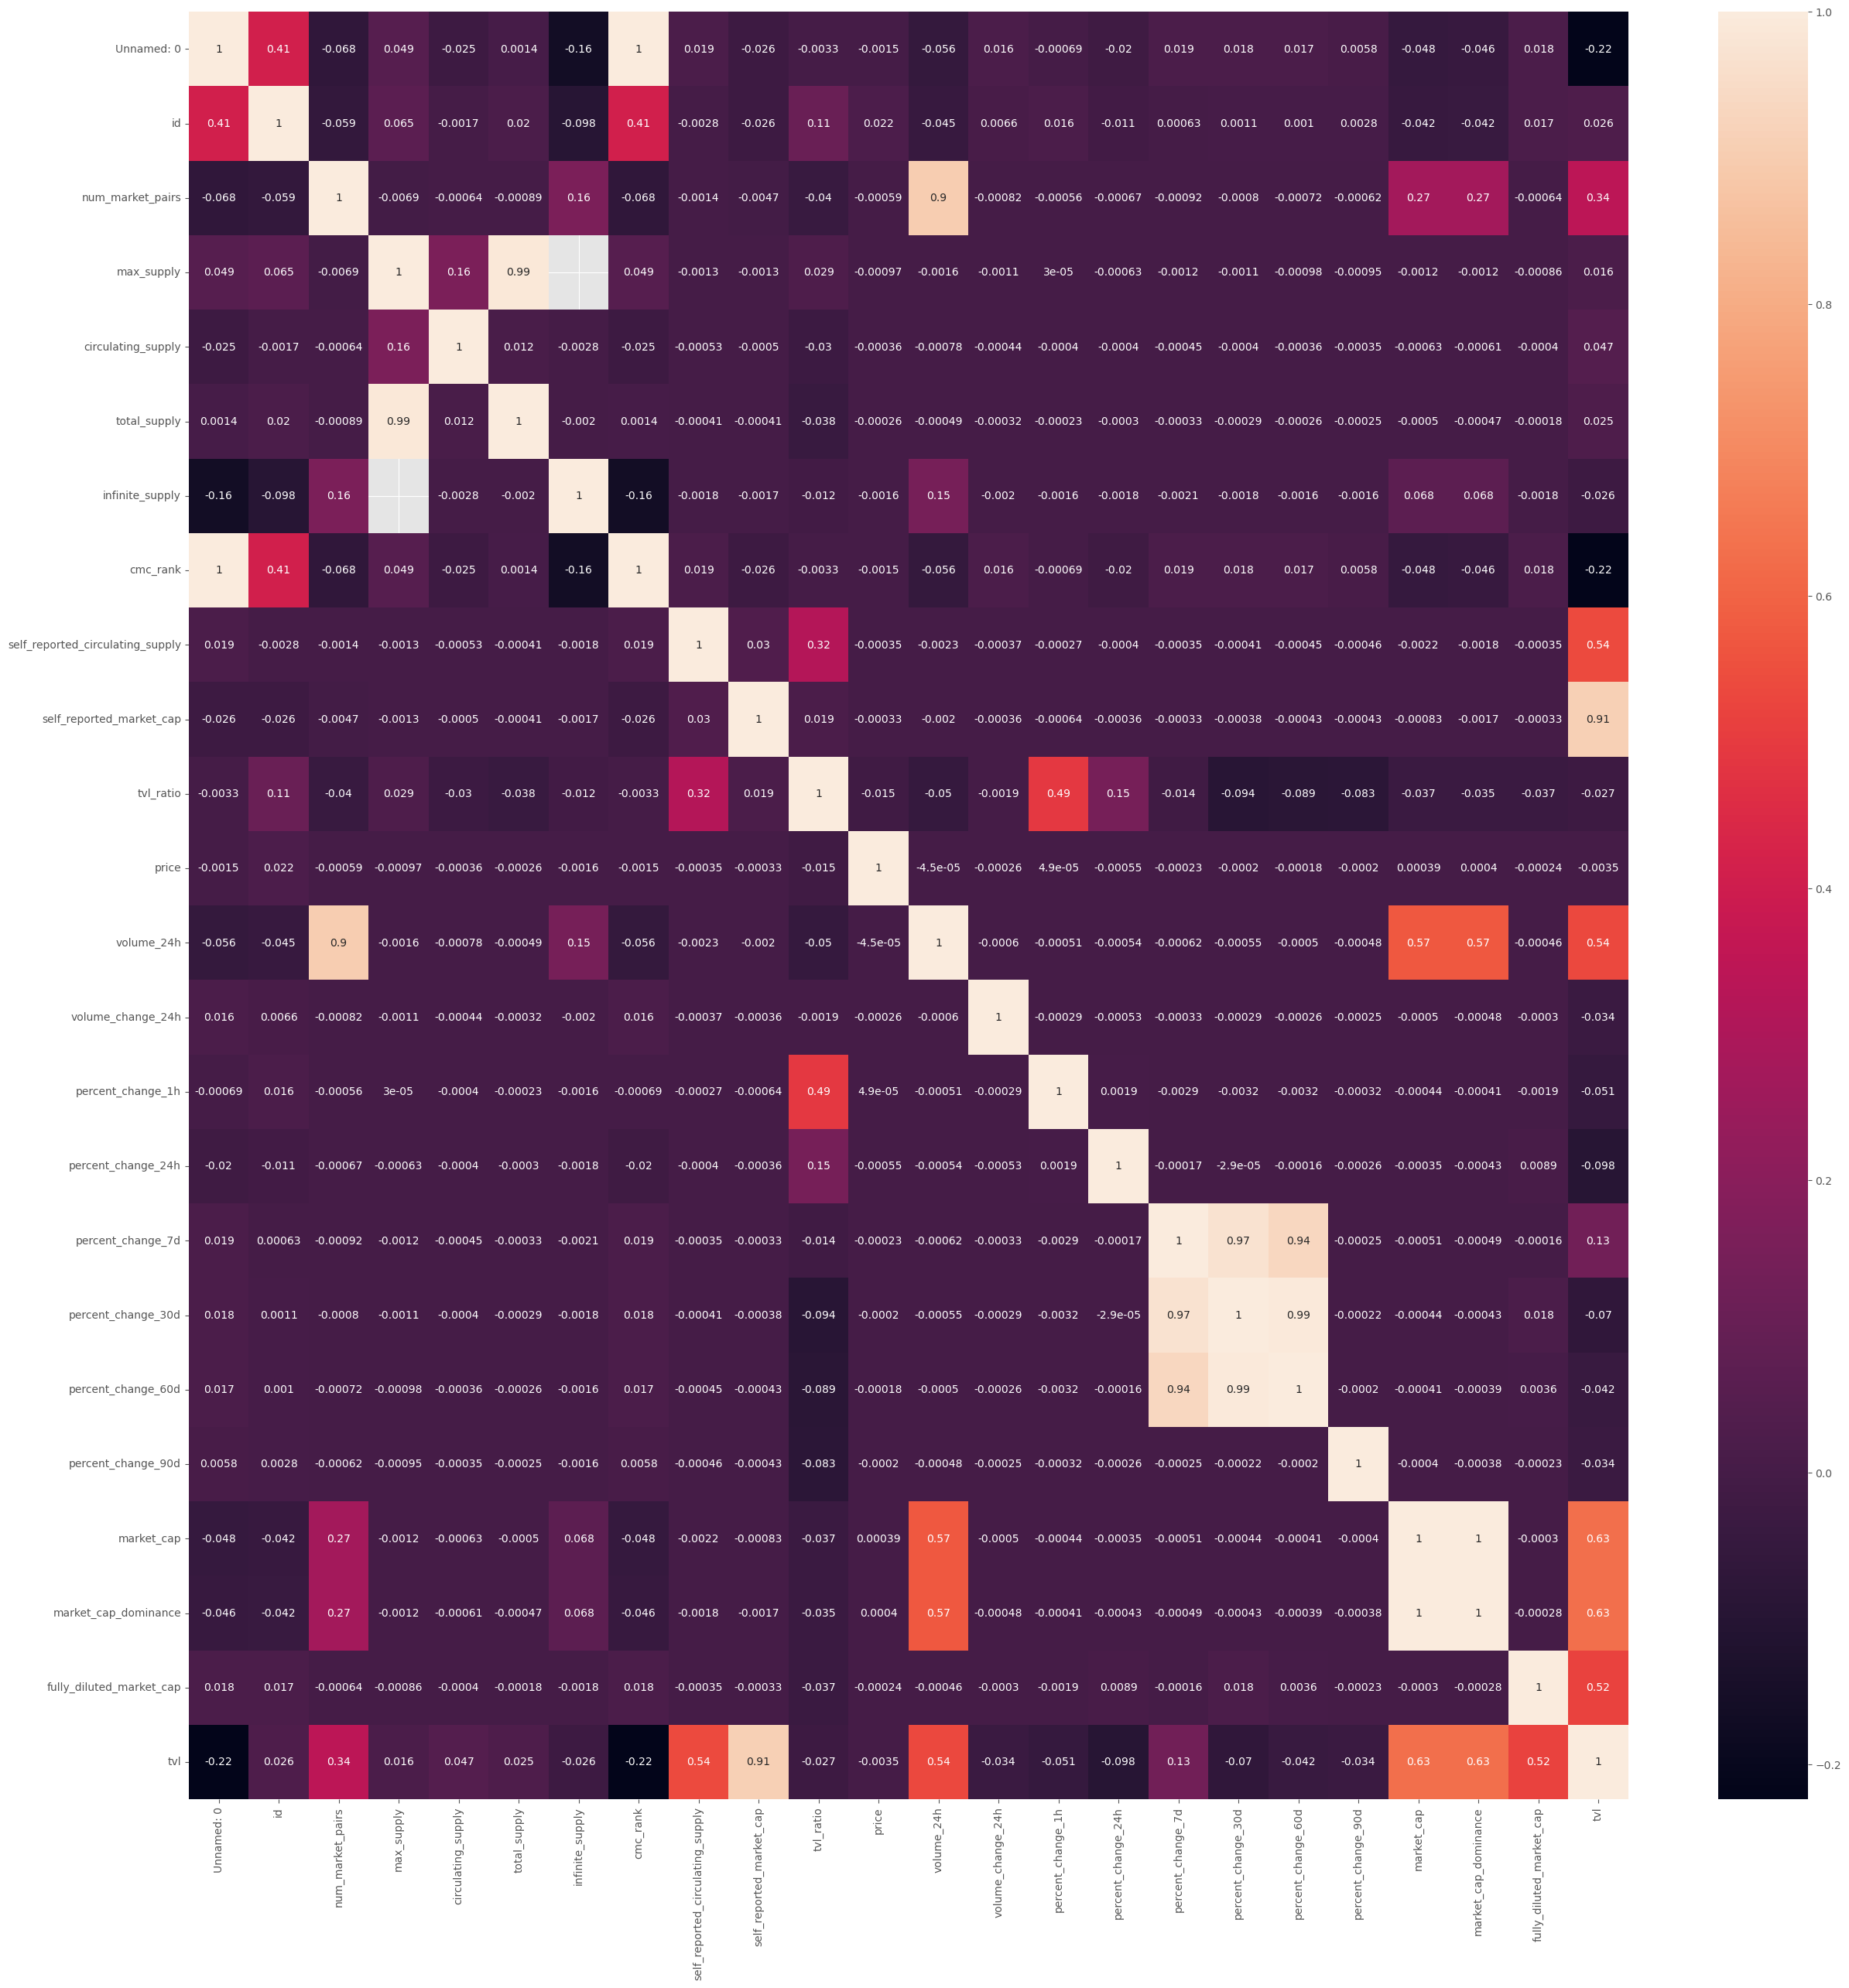

In [207]:
plt.figure(figsize=[30,30])
sns.heatmap(data2023.corr(),annot = True)

## 2017

/var/folders/xy/5yqd00h92792tkx0dp713klr0000gn/T/ipykernel_43878/3681036991.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data2017.corr(),annot = True)


<Axes: >

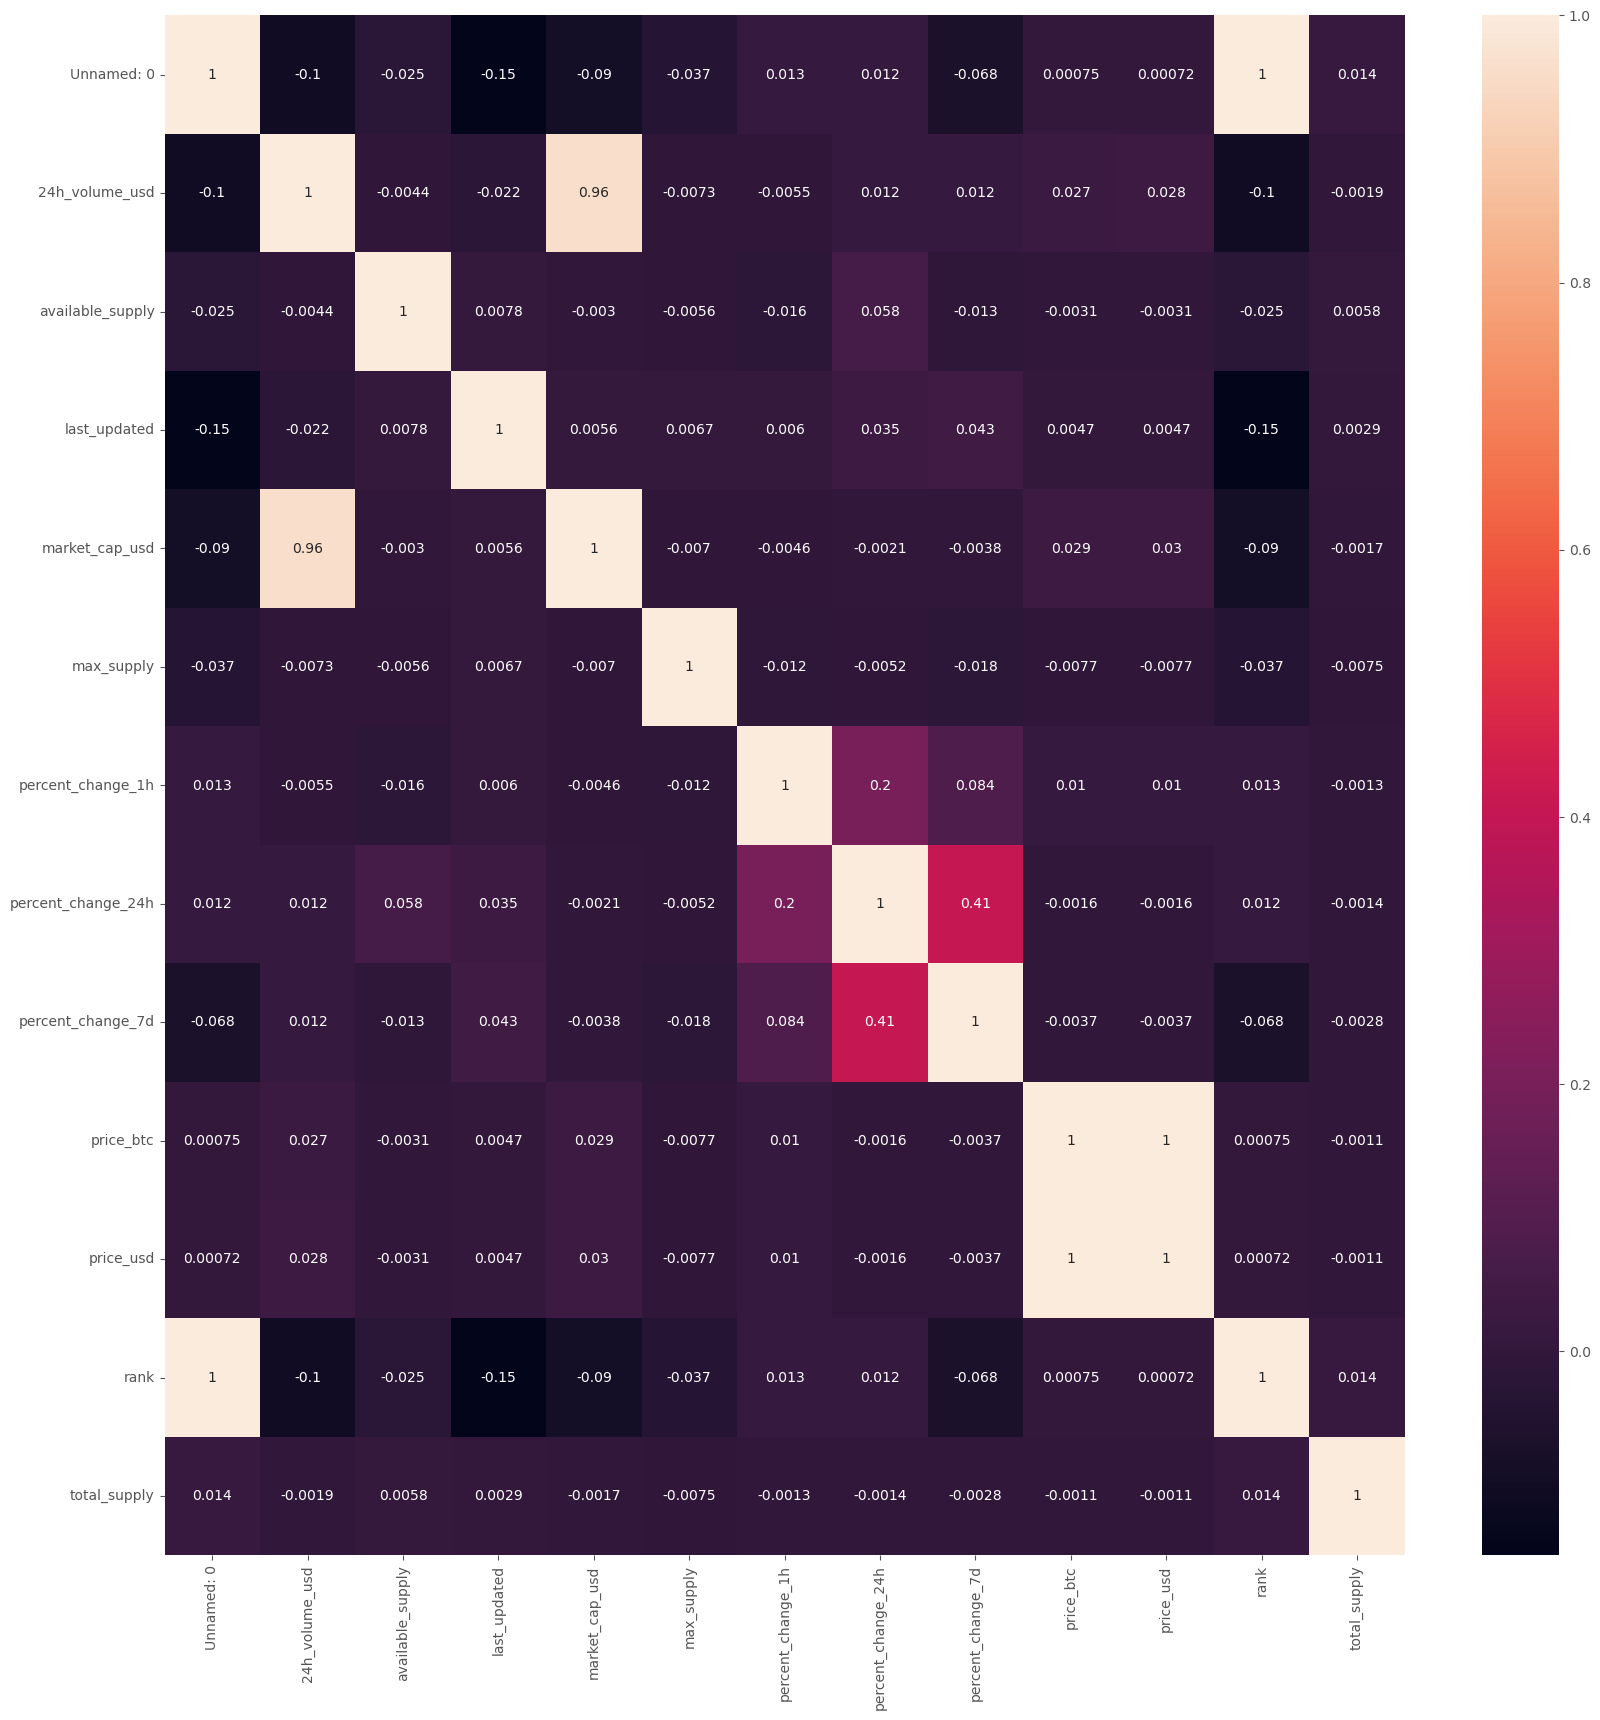

In [209]:
plt.figure(figsize=[20,20])
sns.heatmap(data2017.corr(),annot = True)

## Analysing individual currencies

In [211]:
bch.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-06,622.312012,2477.649902,619.257996,1388.859985,1388.859985,19416896832
1,2017-11-13,1381.819946,1501.160034,863.979004,1172.050049,1172.050049,17448060160
2,2017-11-20,1172.430054,1782.829956,1140.880005,1735.660034,1735.660034,13484672000
3,2017-11-27,1722.930054,1742.400024,1222.099976,1559.930054,1559.930054,9239721024
4,2017-12-04,1560.160034,1731.319946,1226.209961,1323.069946,1323.069946,8752739904


## Two coins have consistently stayed on the top, Bitcoin and Ethereum

## Bitcoin

In [255]:
date = []
for d in btc['Date']:
    if d.split('-')[0] in date:
        date.append('')
    else:
        date.append(d.split('-')[0])

Text(0.5, 1.0, 'Bitcoin Trends')

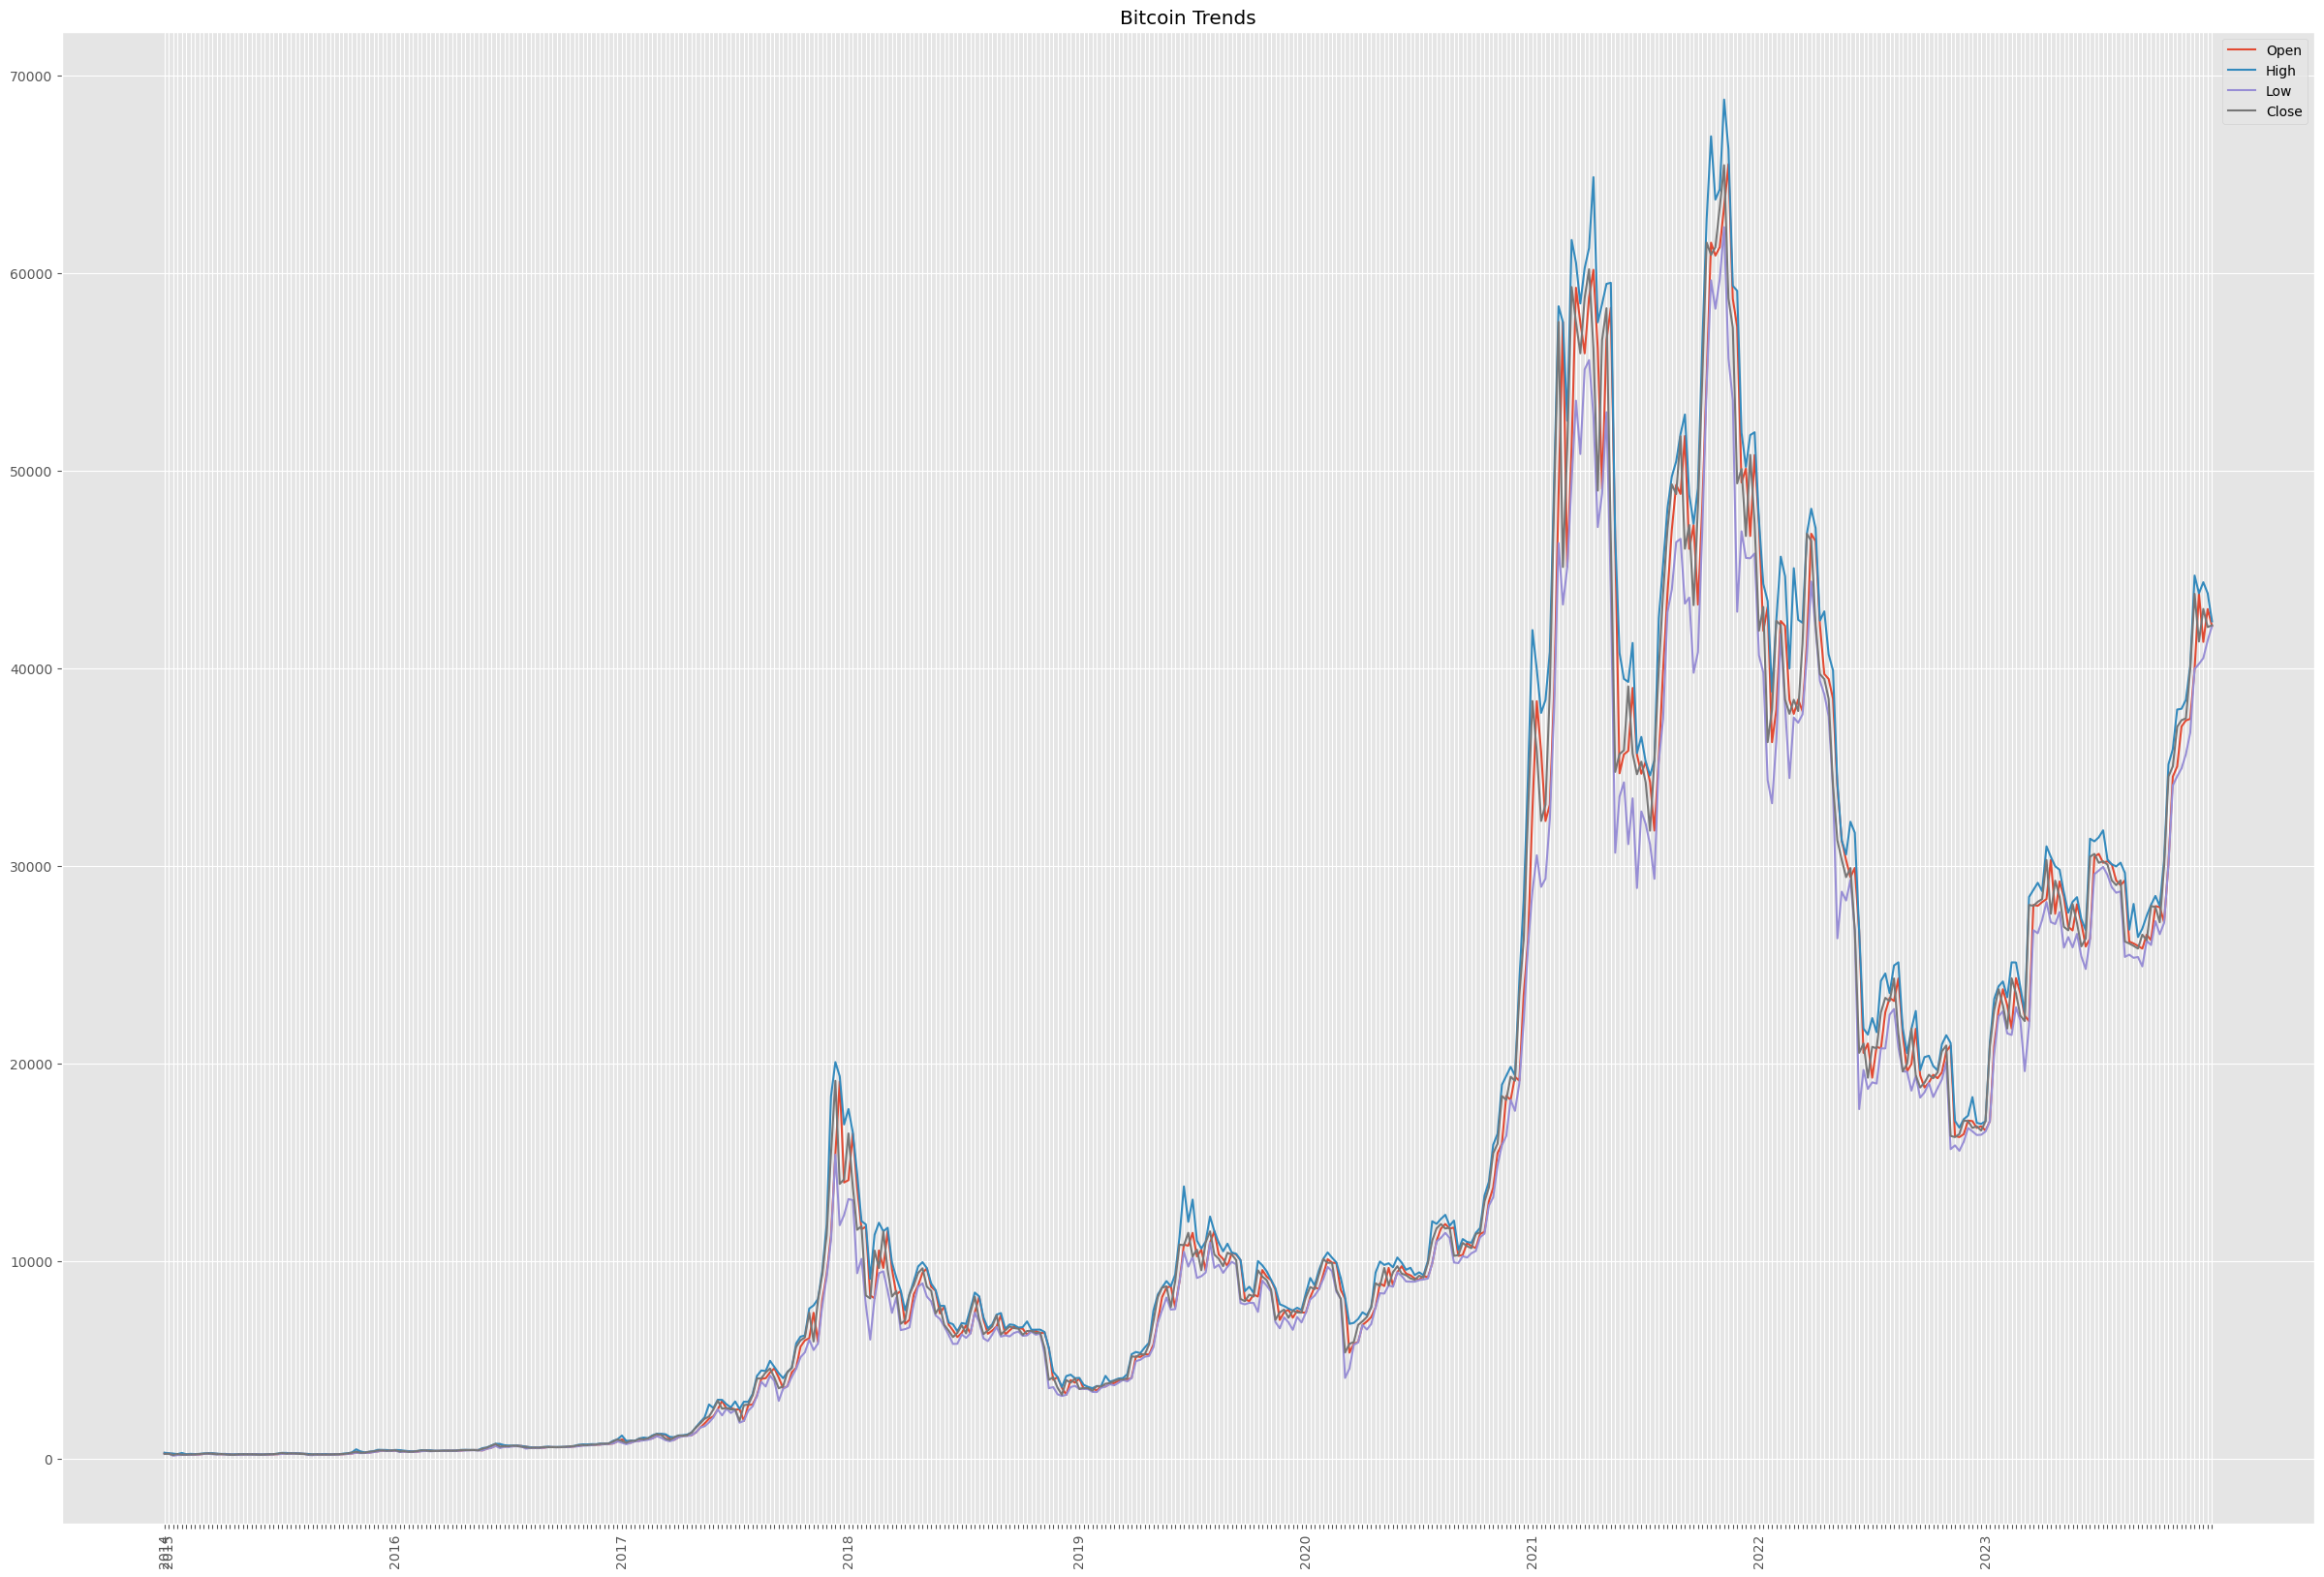

In [256]:
plt.figure(figsize=[30,20])
plt.plot(btc['Date'],btc['Open'])
plt.plot(btc['Date'],btc['High'])
plt.plot(btc['Date'],btc['Low'])
plt.plot(btc['Date'],btc['Close'])
plt.xticks(btc['Date'], date, rotation='vertical')
plt.legend(['Open','High','Low','Close'])
plt.title('Bitcoin Trends')

The Bitcoin prices saw a significant spike in the year 2021 and started declining steadily in 2022 

## Ethereum

In [257]:
date = []
for d in eth['Date']:
    if d.split('-')[0] in date:
        date.append('')
    else:
        date.append(d.split('-')[0])

Text(0.5, 1.0, 'Ethereum Trends')

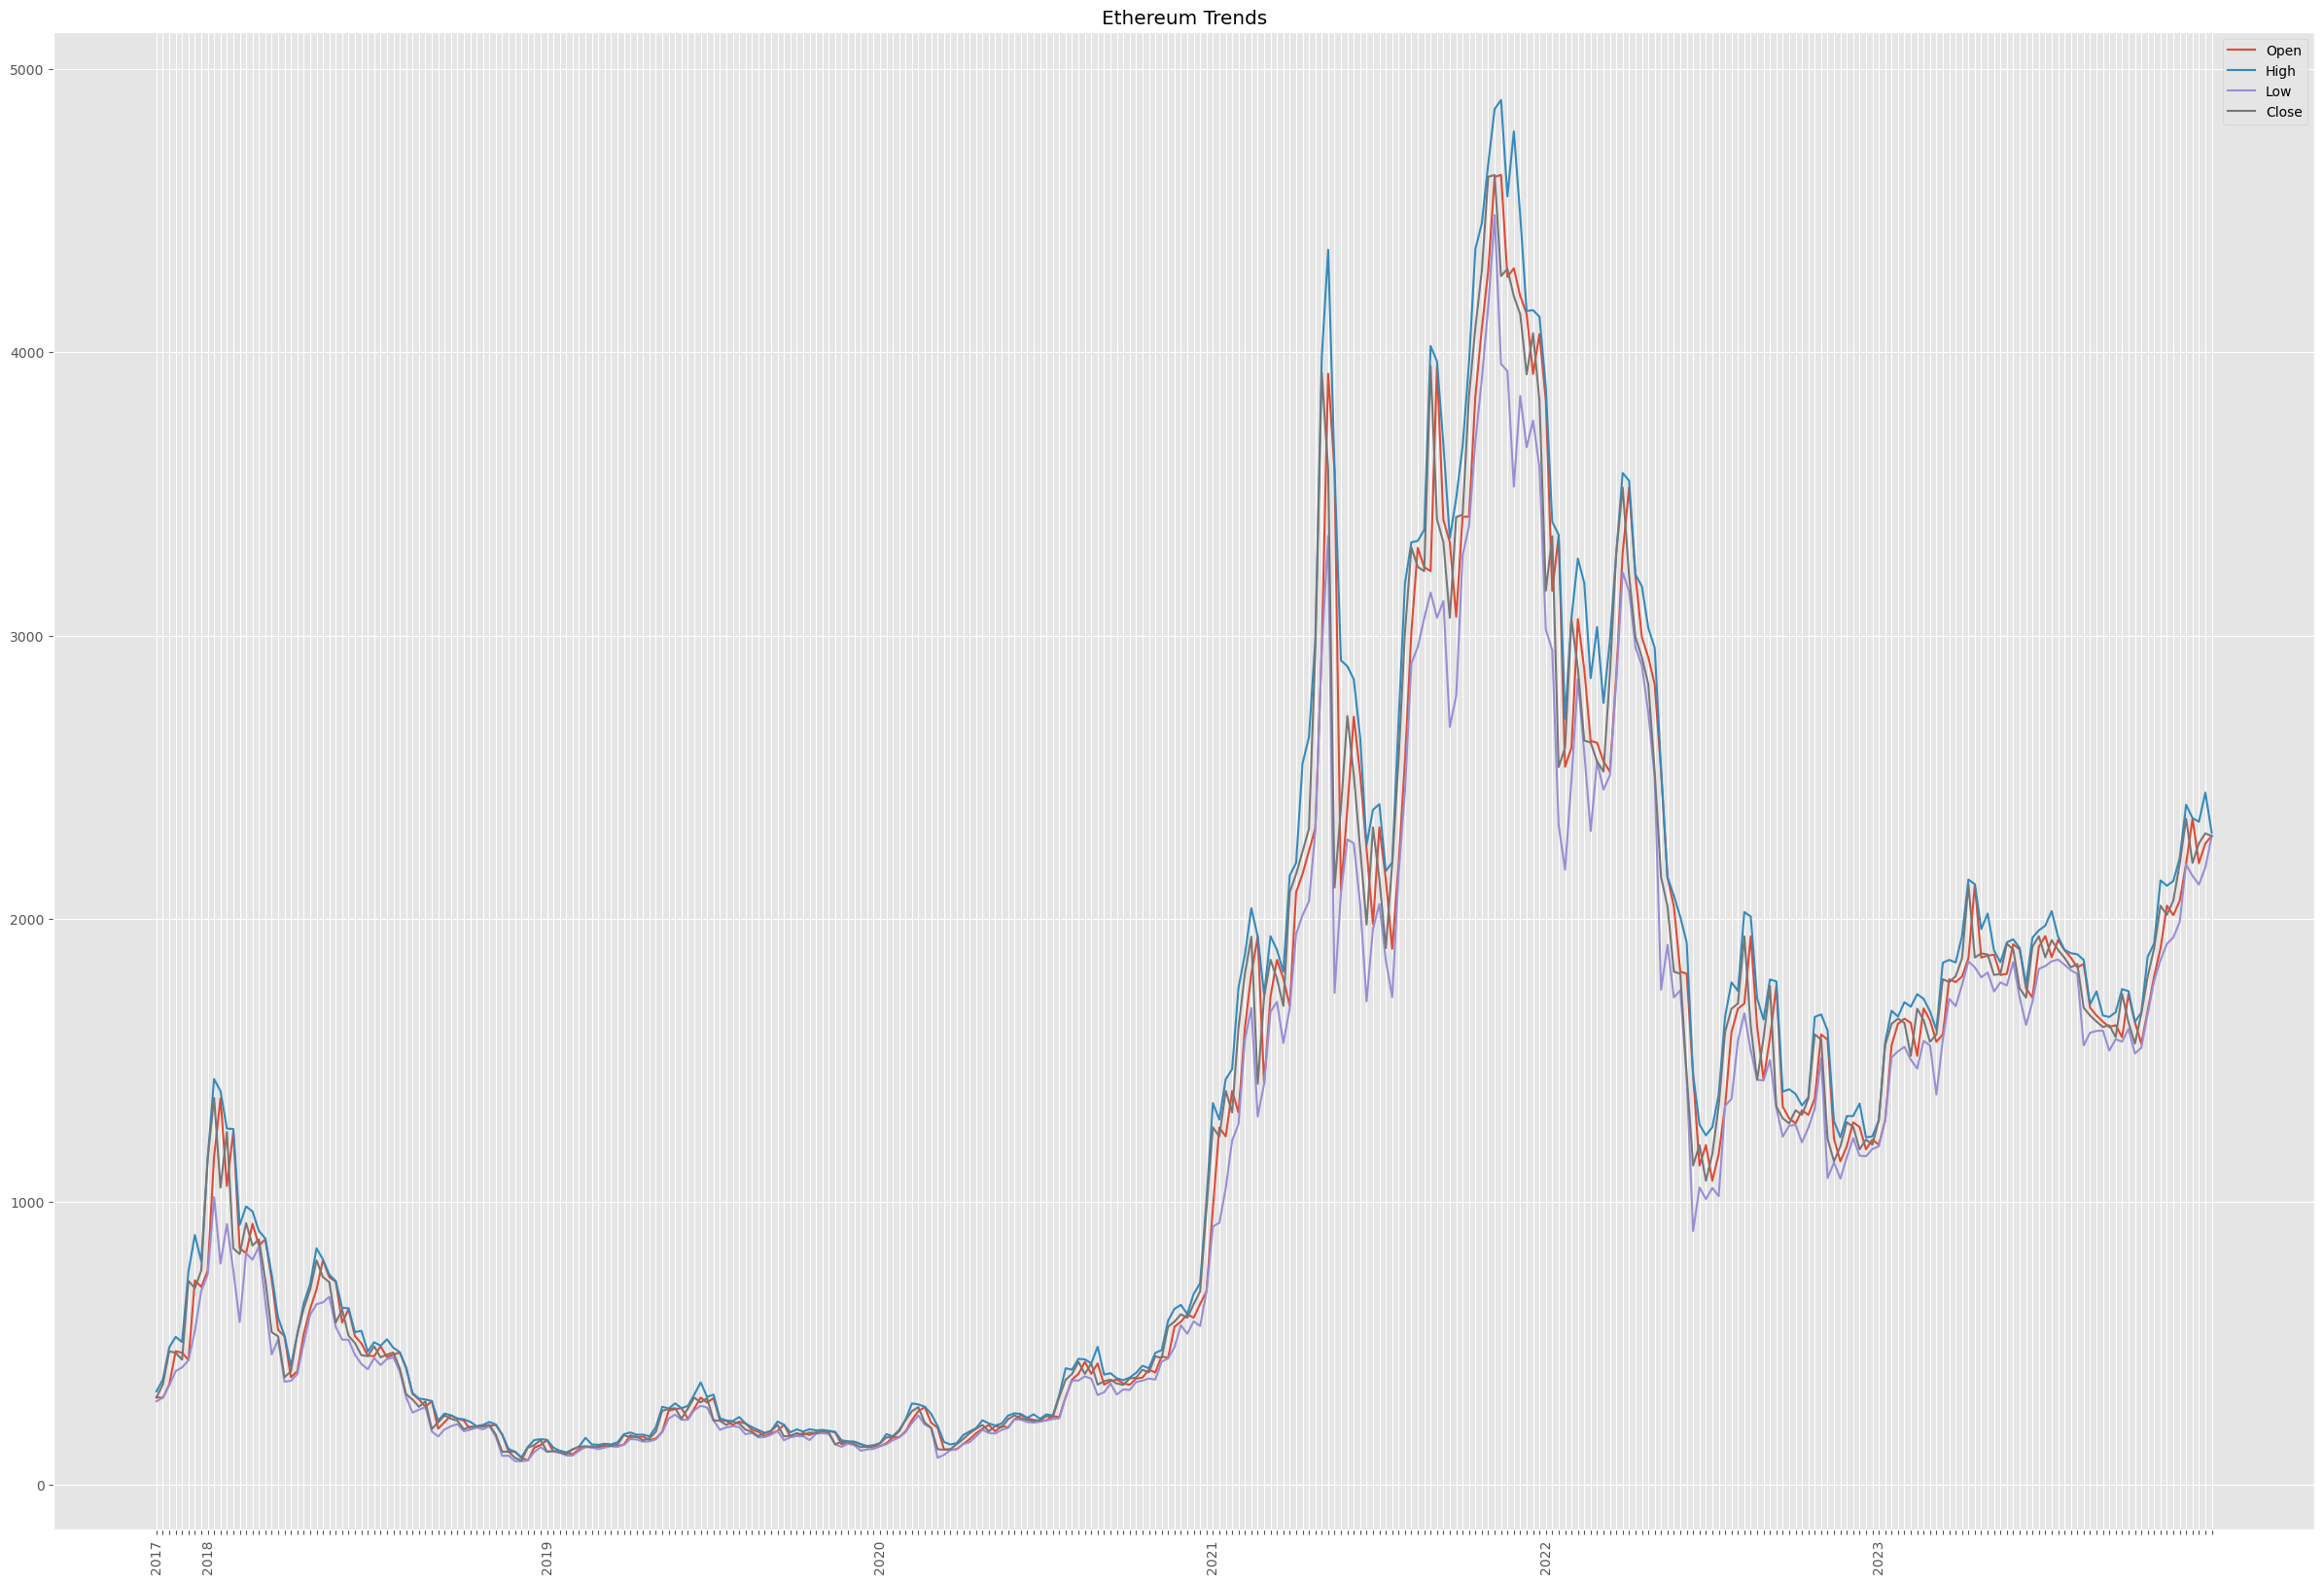

In [258]:
plt.figure(figsize=[30,20])
plt.plot(eth['Date'],eth['Open'])
plt.plot(eth['Date'],eth['High'])
plt.plot(eth['Date'],eth['Low'])
plt.plot(eth['Date'],eth['Close'])
plt.xticks(eth['Date'], date, rotation='vertical')
plt.legend(['Open','High','Low','Close'])
plt.title('Ethereum Trends')

The Ethereum experienced experienced a similar trend to Bitcoin with the prices seeing a significant spike in the year 2021 and started declining steadily in 2022

## Three coins joined the race to the top, Solana, Tether USDt, Binance Coin

## Solana

In [259]:
date = []
for d in sol['Date']:
    if d.split('-')[0] in date:
        date.append('')
    else:
        date.append(d.split('-')[0])

Text(0.5, 1.0, 'Solana Trends')

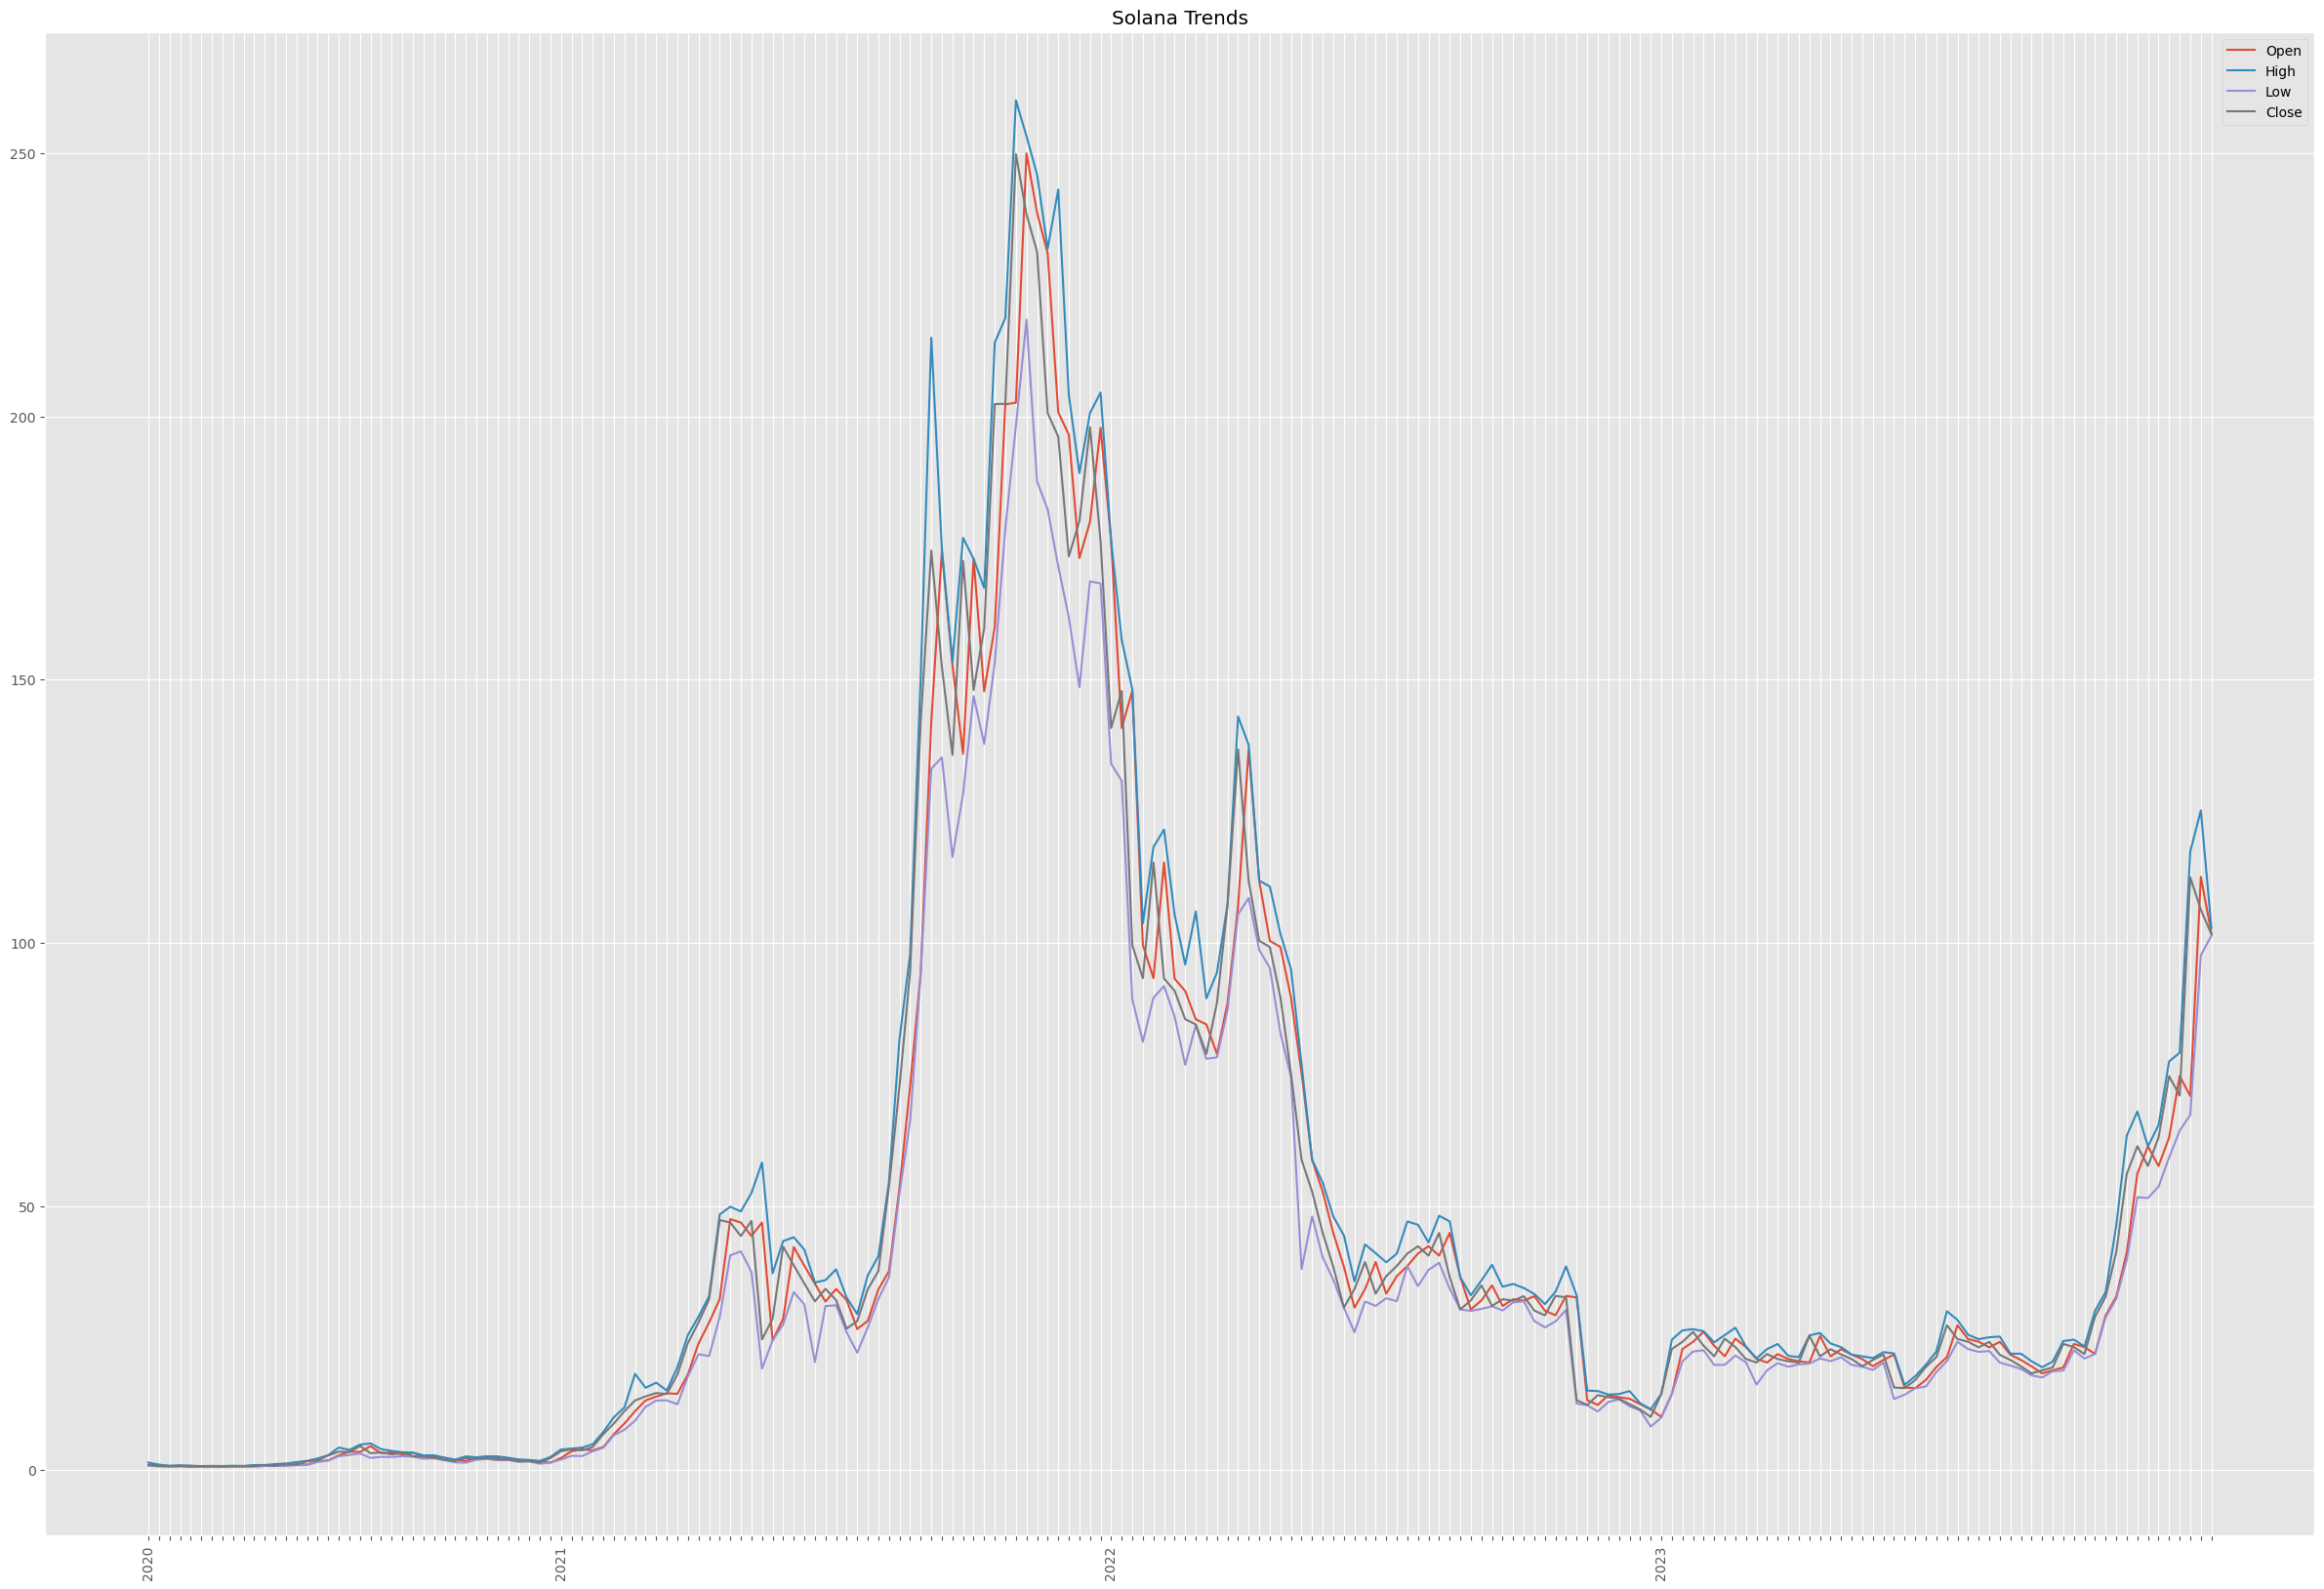

In [260]:
plt.figure(figsize=[30,20])
plt.plot(sol['Date'],sol['Open'])
plt.plot(sol['Date'],sol['High'])
plt.plot(sol['Date'],sol['Low'])
plt.plot(sol['Date'],sol['Close'])
plt.xticks(sol['Date'], date, rotation='vertical')
plt.legend(['Open','High','Low','Close'])
plt.title('Solana Trends')

## Tether USDt

In [261]:
date = []
for d in usdt['Date']:
    if d.split('-')[0] in date:
        date.append('')
    else:
        date.append(d.split('-')[0])

Text(0.5, 1.0, 'Tether USDt Trends')

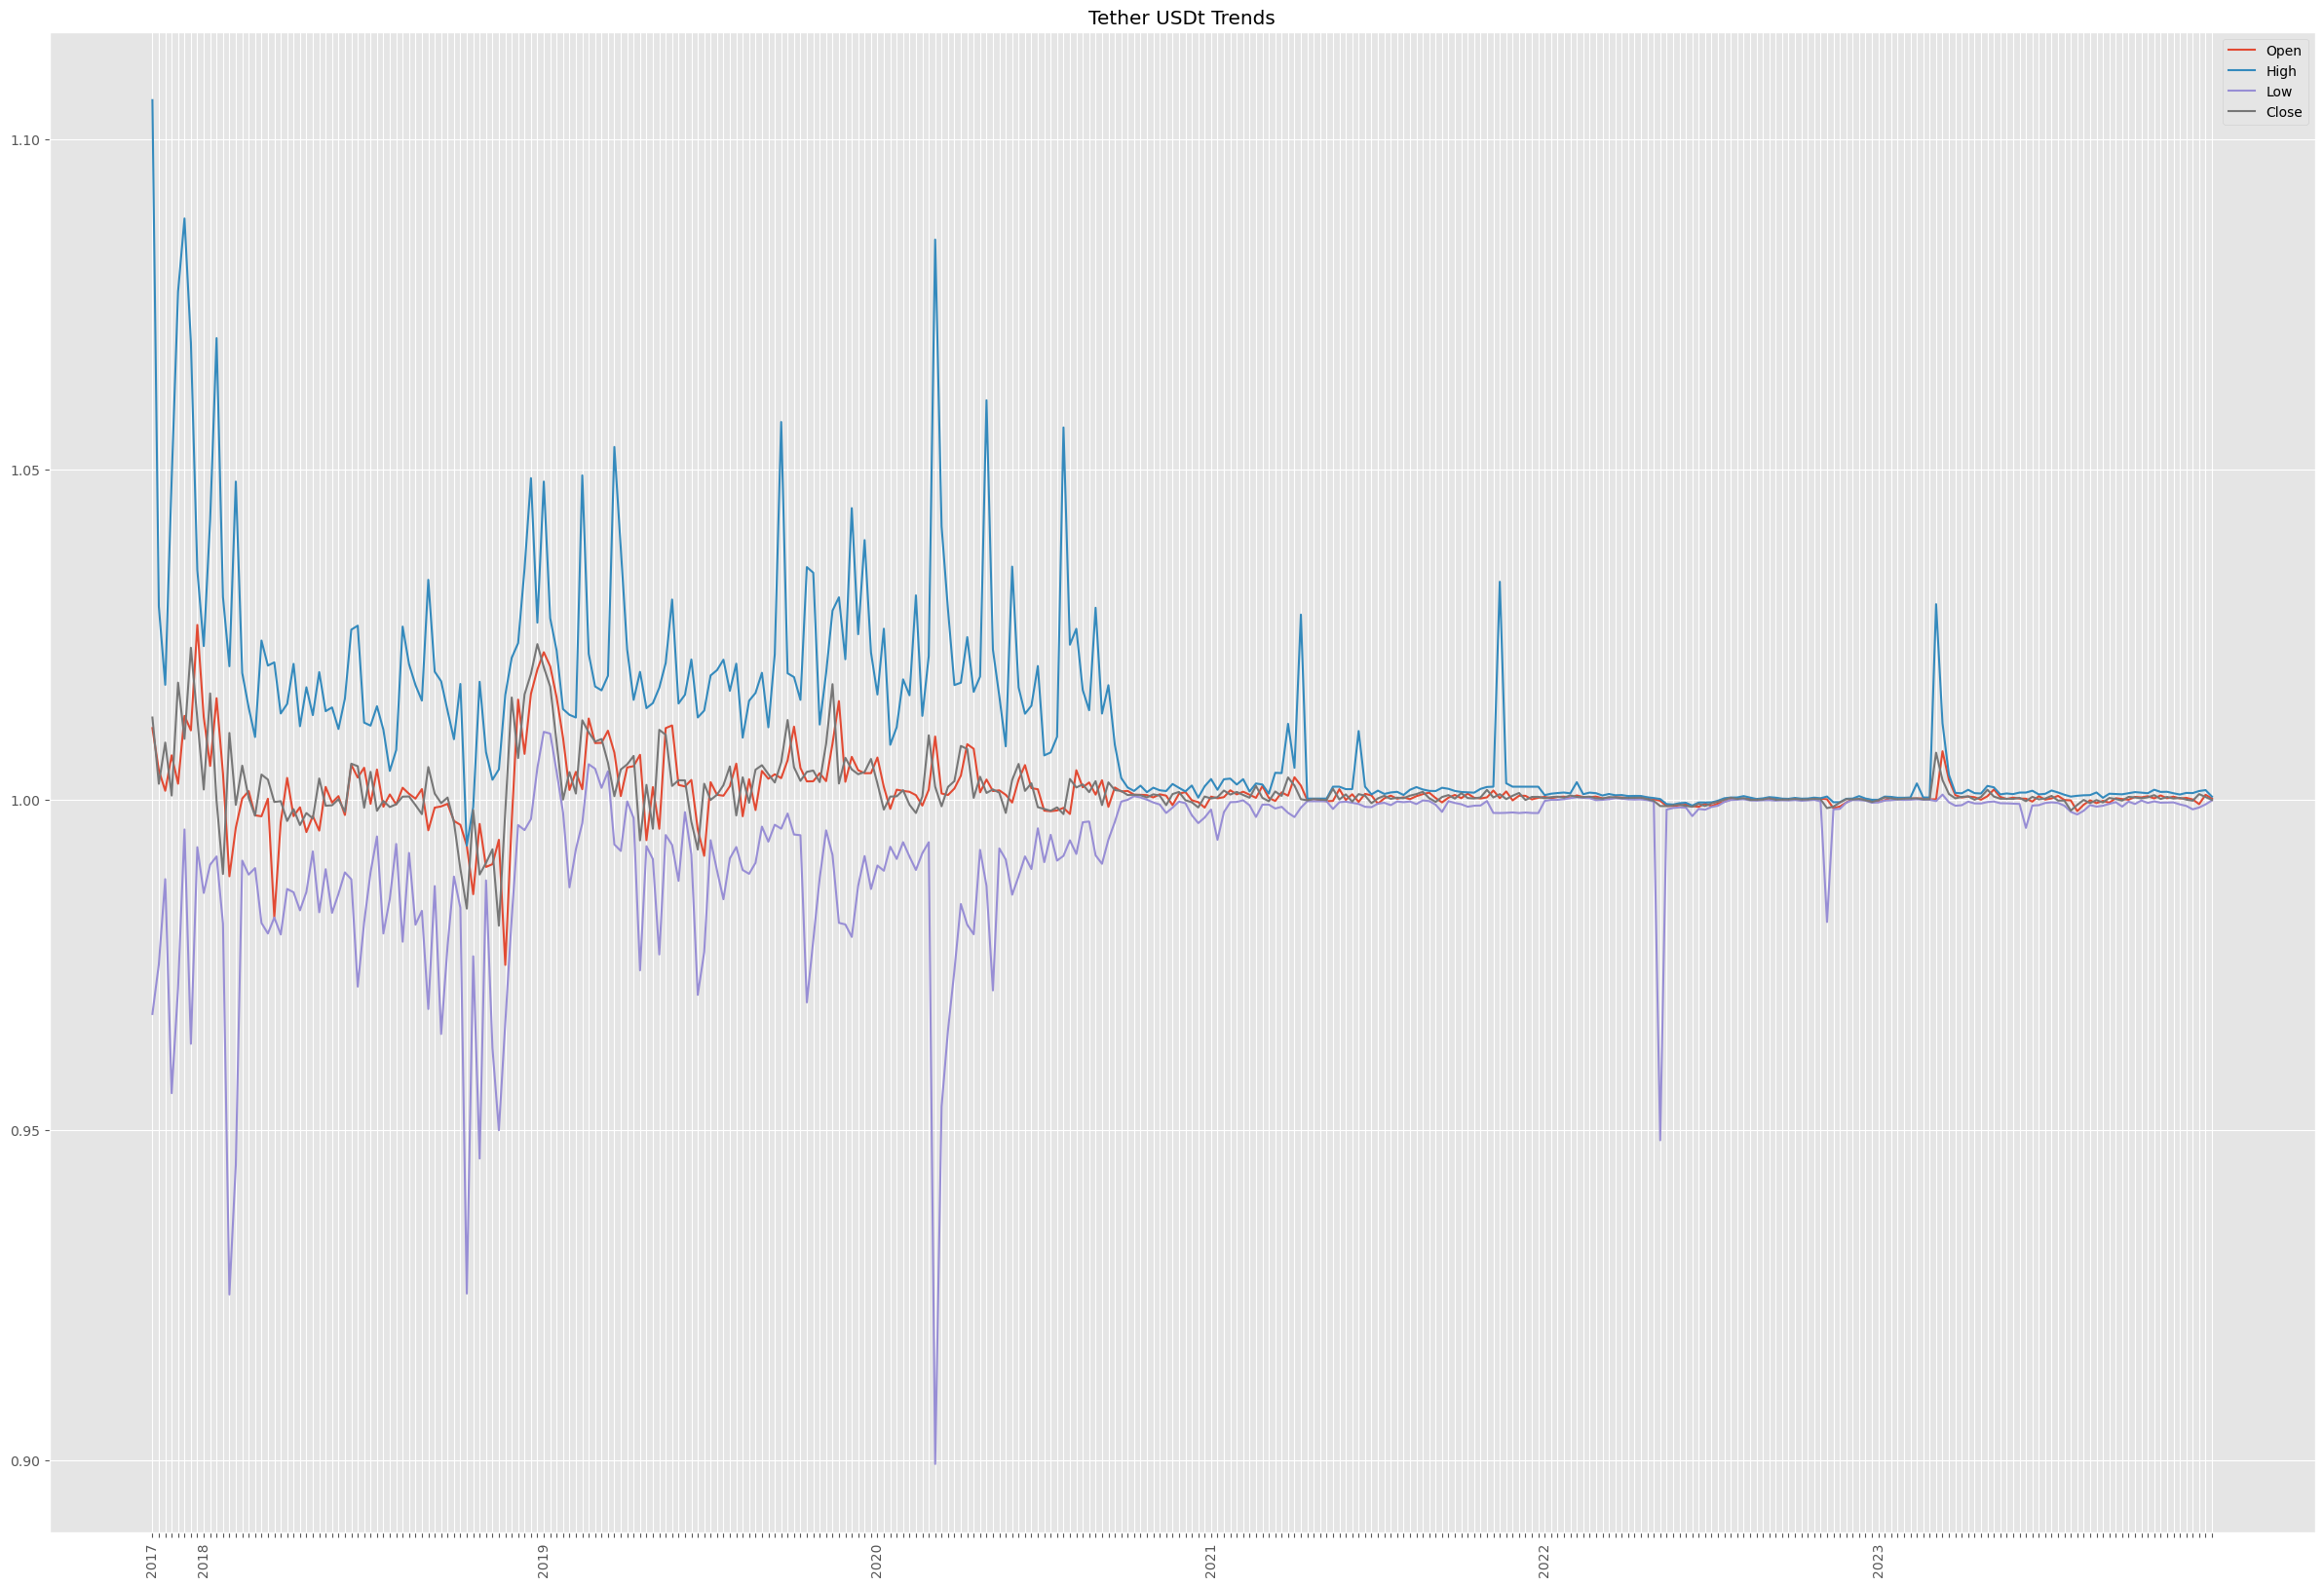

In [262]:
plt.figure(figsize=[30,20])
plt.plot(usdt['Date'],usdt['Open'])
plt.plot(usdt['Date'],usdt['High'])
plt.plot(usdt['Date'],usdt['Low'])
plt.plot(usdt['Date'],usdt['Close'])
plt.xticks(usdt['Date'], date, rotation='vertical')
plt.legend(['Open','High','Low','Close'])
plt.title('Tether USDt Trends')

## Binance Coin

In [263]:
date = []
for d in bnb['Date']:
    if d.split('-')[0] in date:
        date.append('')
    else:
        date.append(d.split('-')[0])

Text(0.5, 1.0, 'Binance Coin Trends')

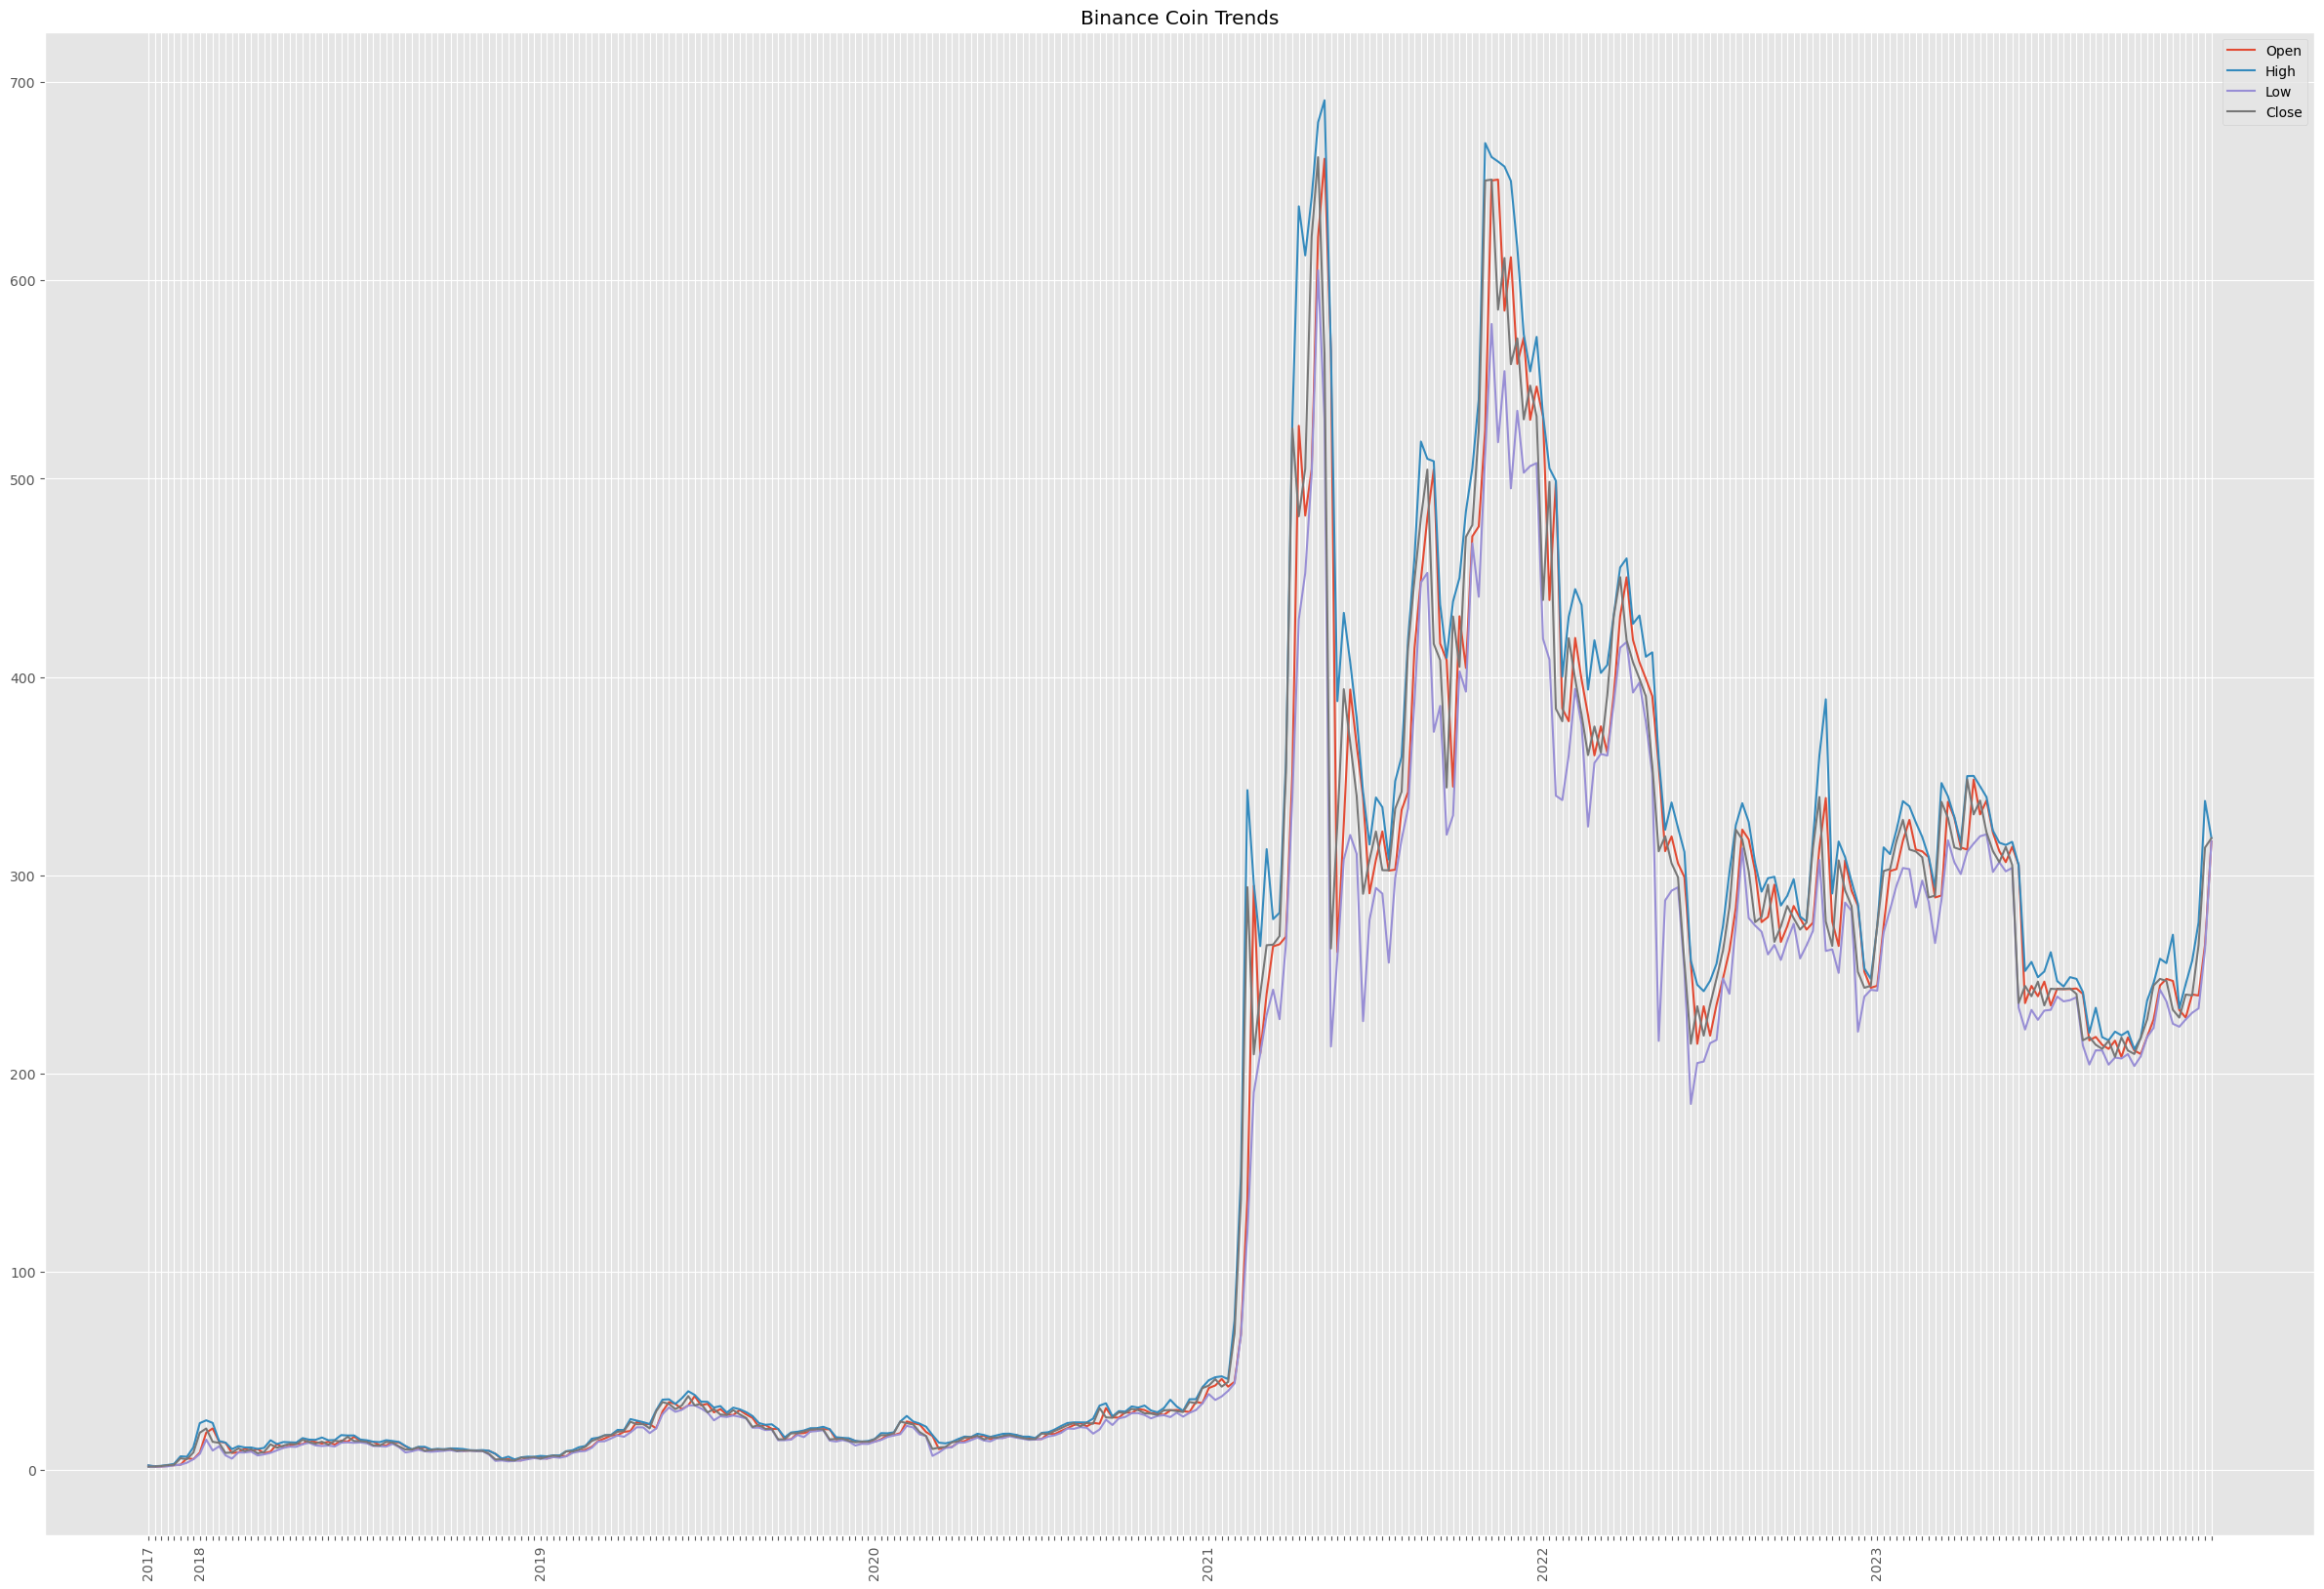

In [264]:
plt.figure(figsize=[30,20])
plt.plot(bnb['Date'],bnb['Open'])
plt.plot(bnb['Date'],bnb['High'])
plt.plot(bnb['Date'],bnb['Low'])
plt.plot(bnb['Date'],bnb['Close'])
plt.xticks(bnb['Date'], date, rotation='vertical')
plt.legend(['Open','High','Low','Close'])
plt.title('Binance Coin Trends')

## Three coin dropped out of the race, Bitcoin Cash, IOTA and Ripple

## Bitcoin Cash

In [265]:
date = []
for d in bch['Date']:
    if d.split('-')[0] in date:
        date.append('')
    else:
        date.append(d.split('-')[0])

Text(0.5, 1.0, 'Bitcoin Cash Trends')

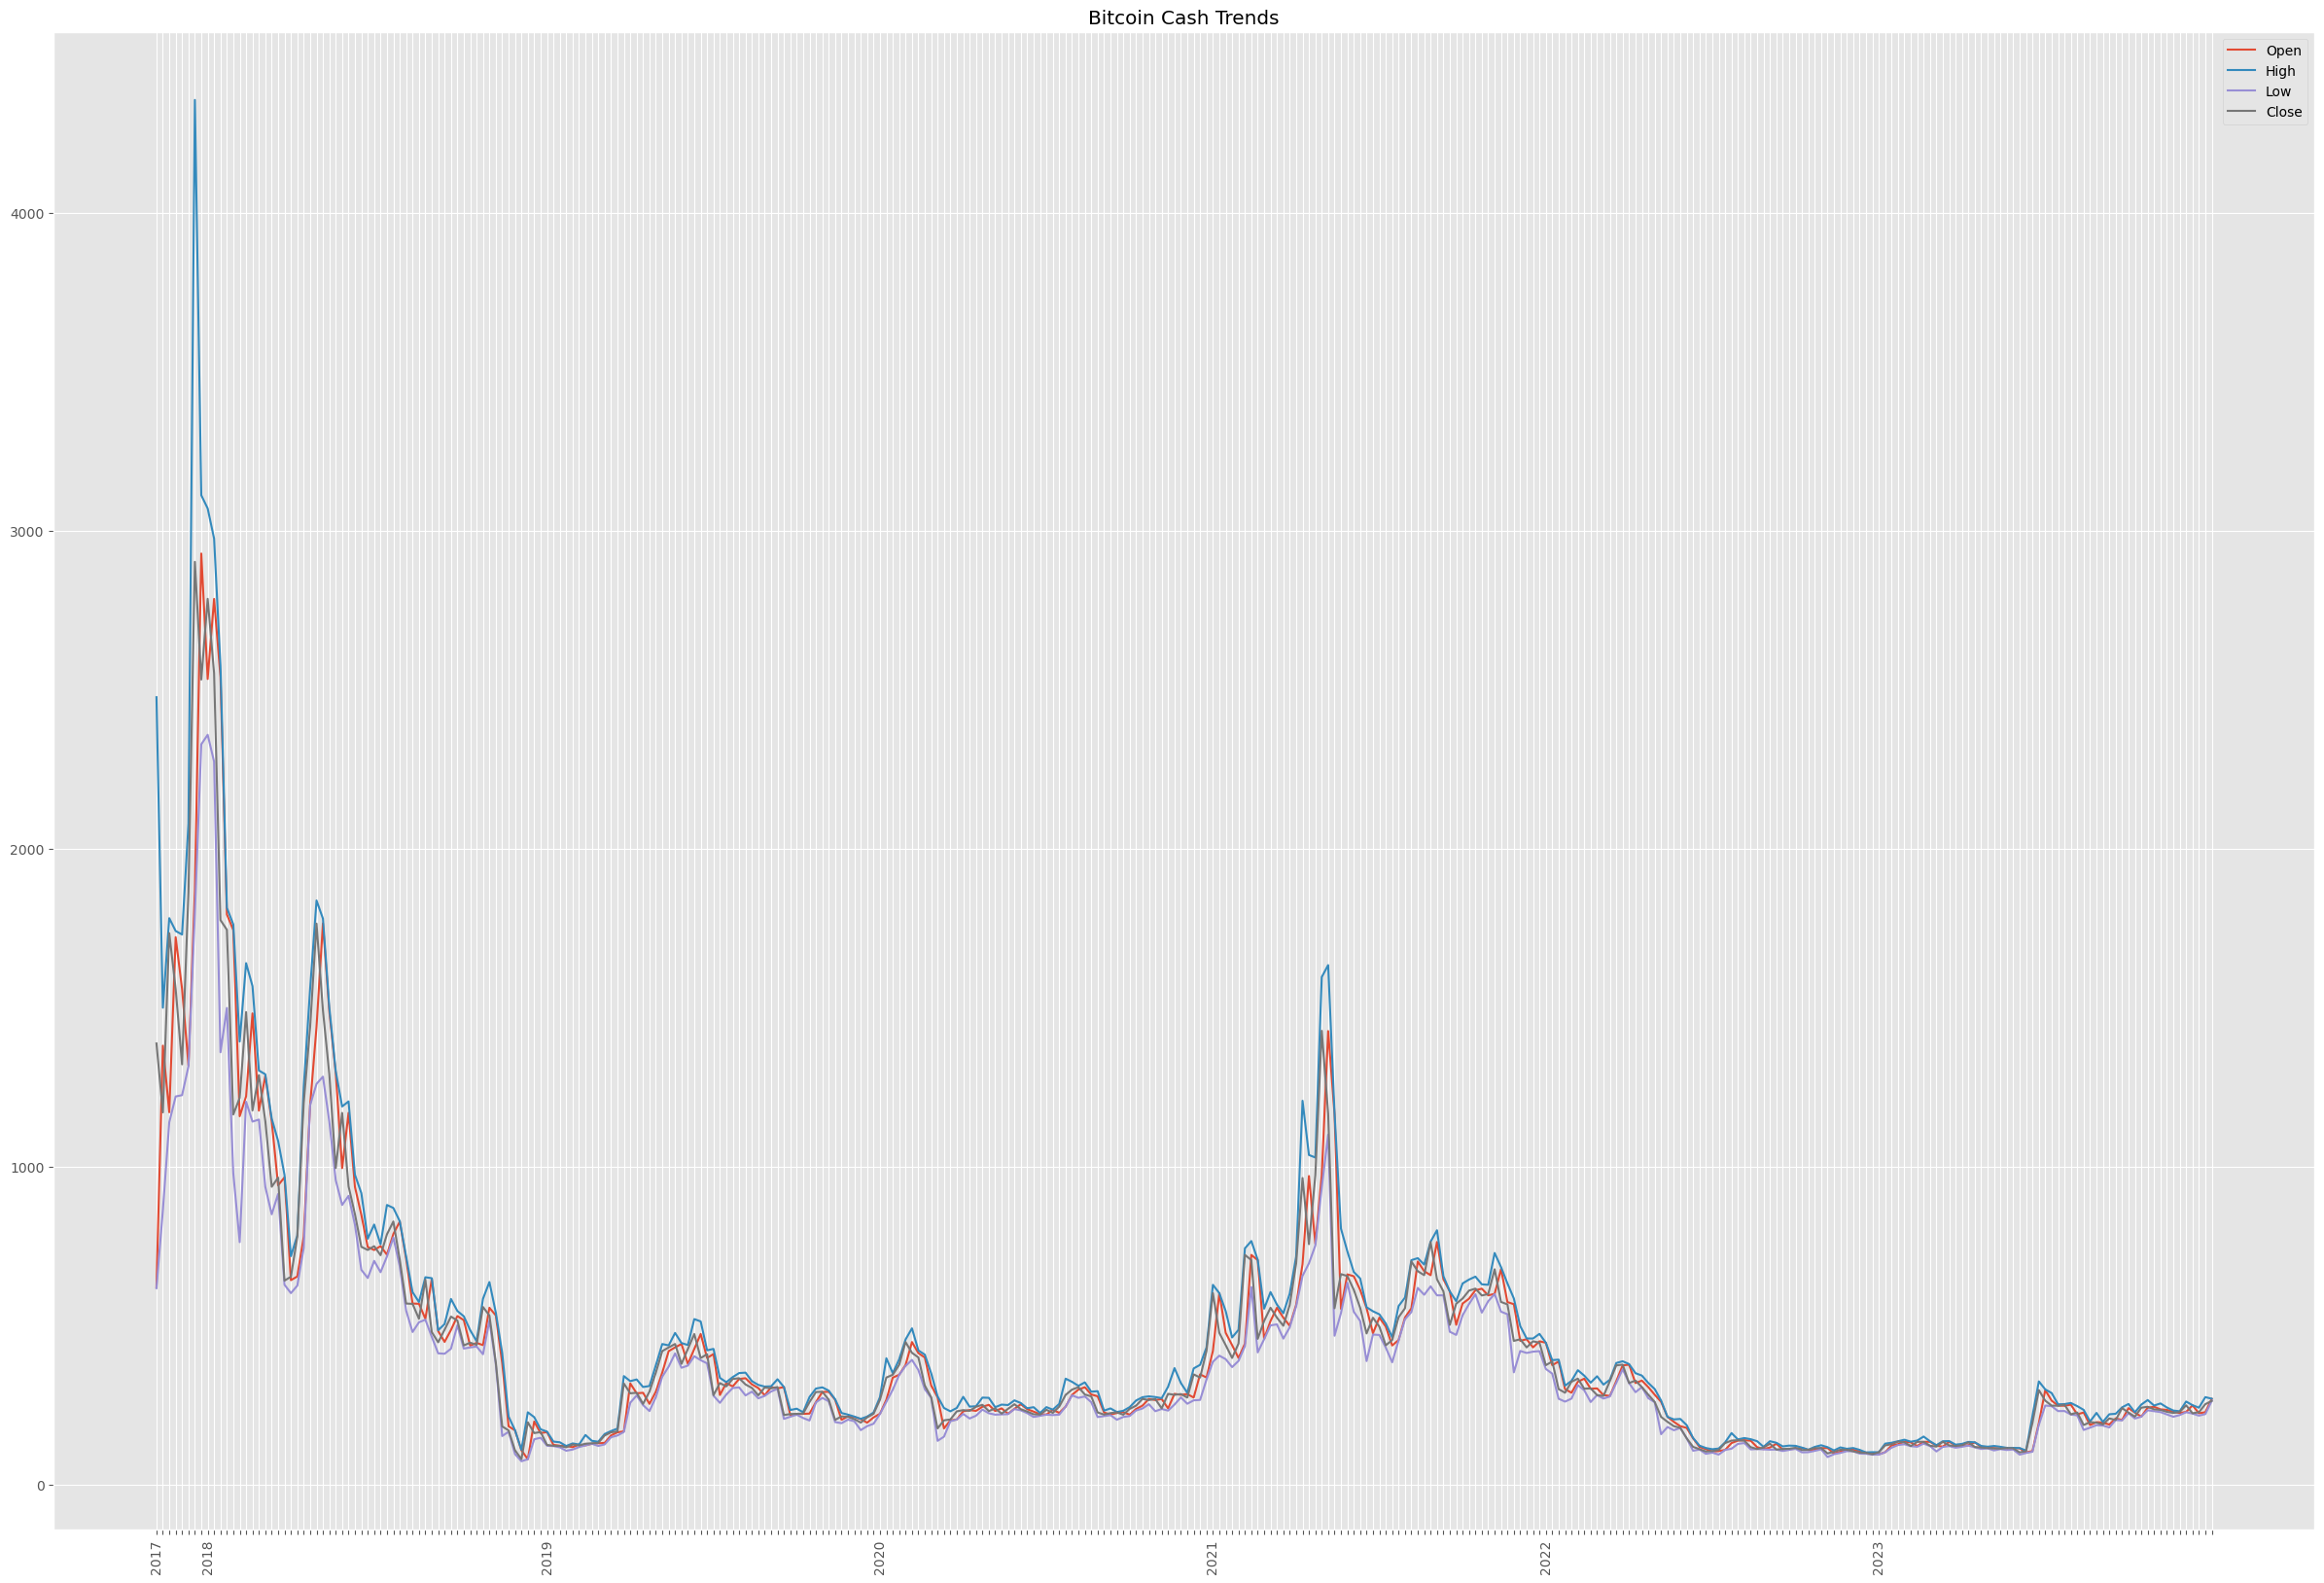

In [266]:
plt.figure(figsize=[30,20])
plt.plot(bch['Date'],bch['Open'])
plt.plot(bch['Date'],bch['High'])
plt.plot(bch['Date'],bch['Low'])
plt.plot(bch['Date'],bch['Close'])
plt.xticks(bch['Date'], date, rotation='vertical')
plt.legend(['Open','High','Low','Close'])
plt.title('Bitcoin Cash Trends')

## IOTA

In [267]:
date = []
for d in iota['Date']:
    if d.split('-')[0] in date:
        date.append('')
    else:
        date.append(d.split('-')[0])

Text(0.5, 1.0, 'IOTA Cash Trends')

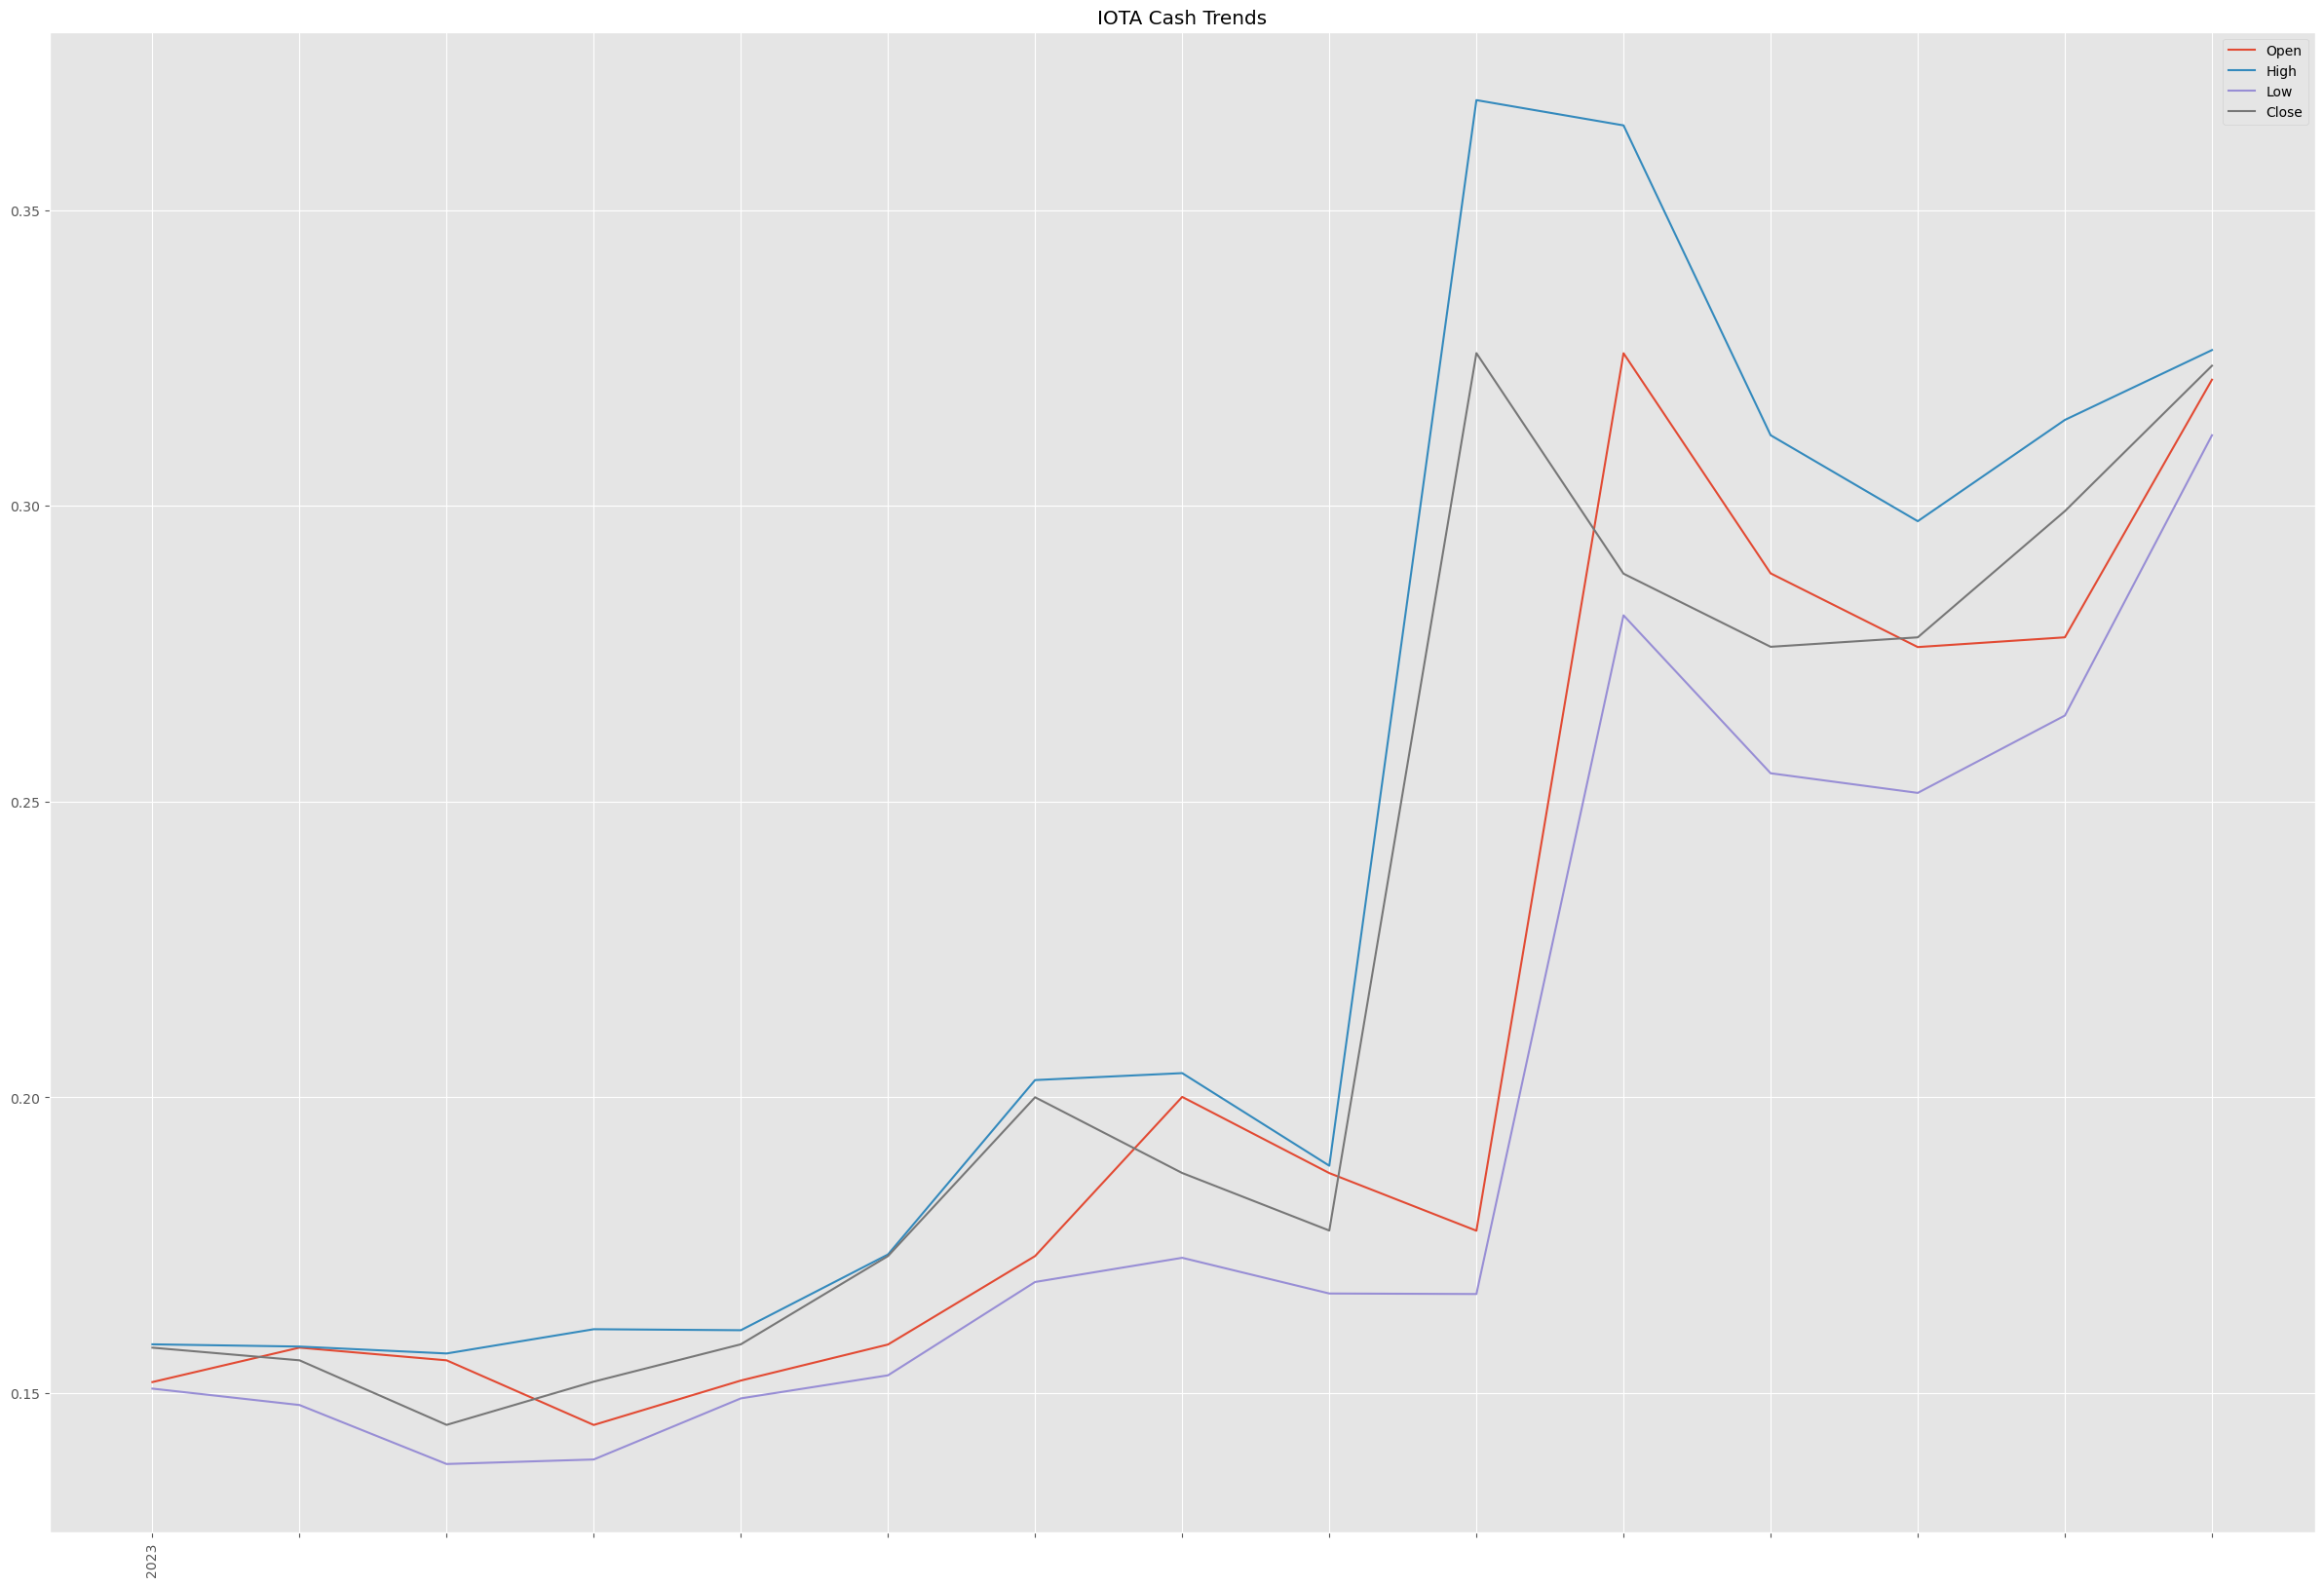

In [268]:
plt.figure(figsize=[30,20])
plt.plot(iota['Date'],iota['Open'])
plt.plot(iota['Date'],iota['High'])
plt.plot(iota['Date'],iota['Low'])
plt.plot(iota['Date'],iota['Close'])
plt.xticks(iota['Date'], date, rotation='vertical')
plt.legend(['Open','High','Low','Close'])
plt.title('IOTA Cash Trends')

## Ripple

In [270]:
date = []
for d in xrp['Date']:
    if d.split('-')[0] in date:
        date.append('')
    else:
        date.append(d.split('-')[0])

Text(0.5, 1.0, 'Ripple Cash Trends')

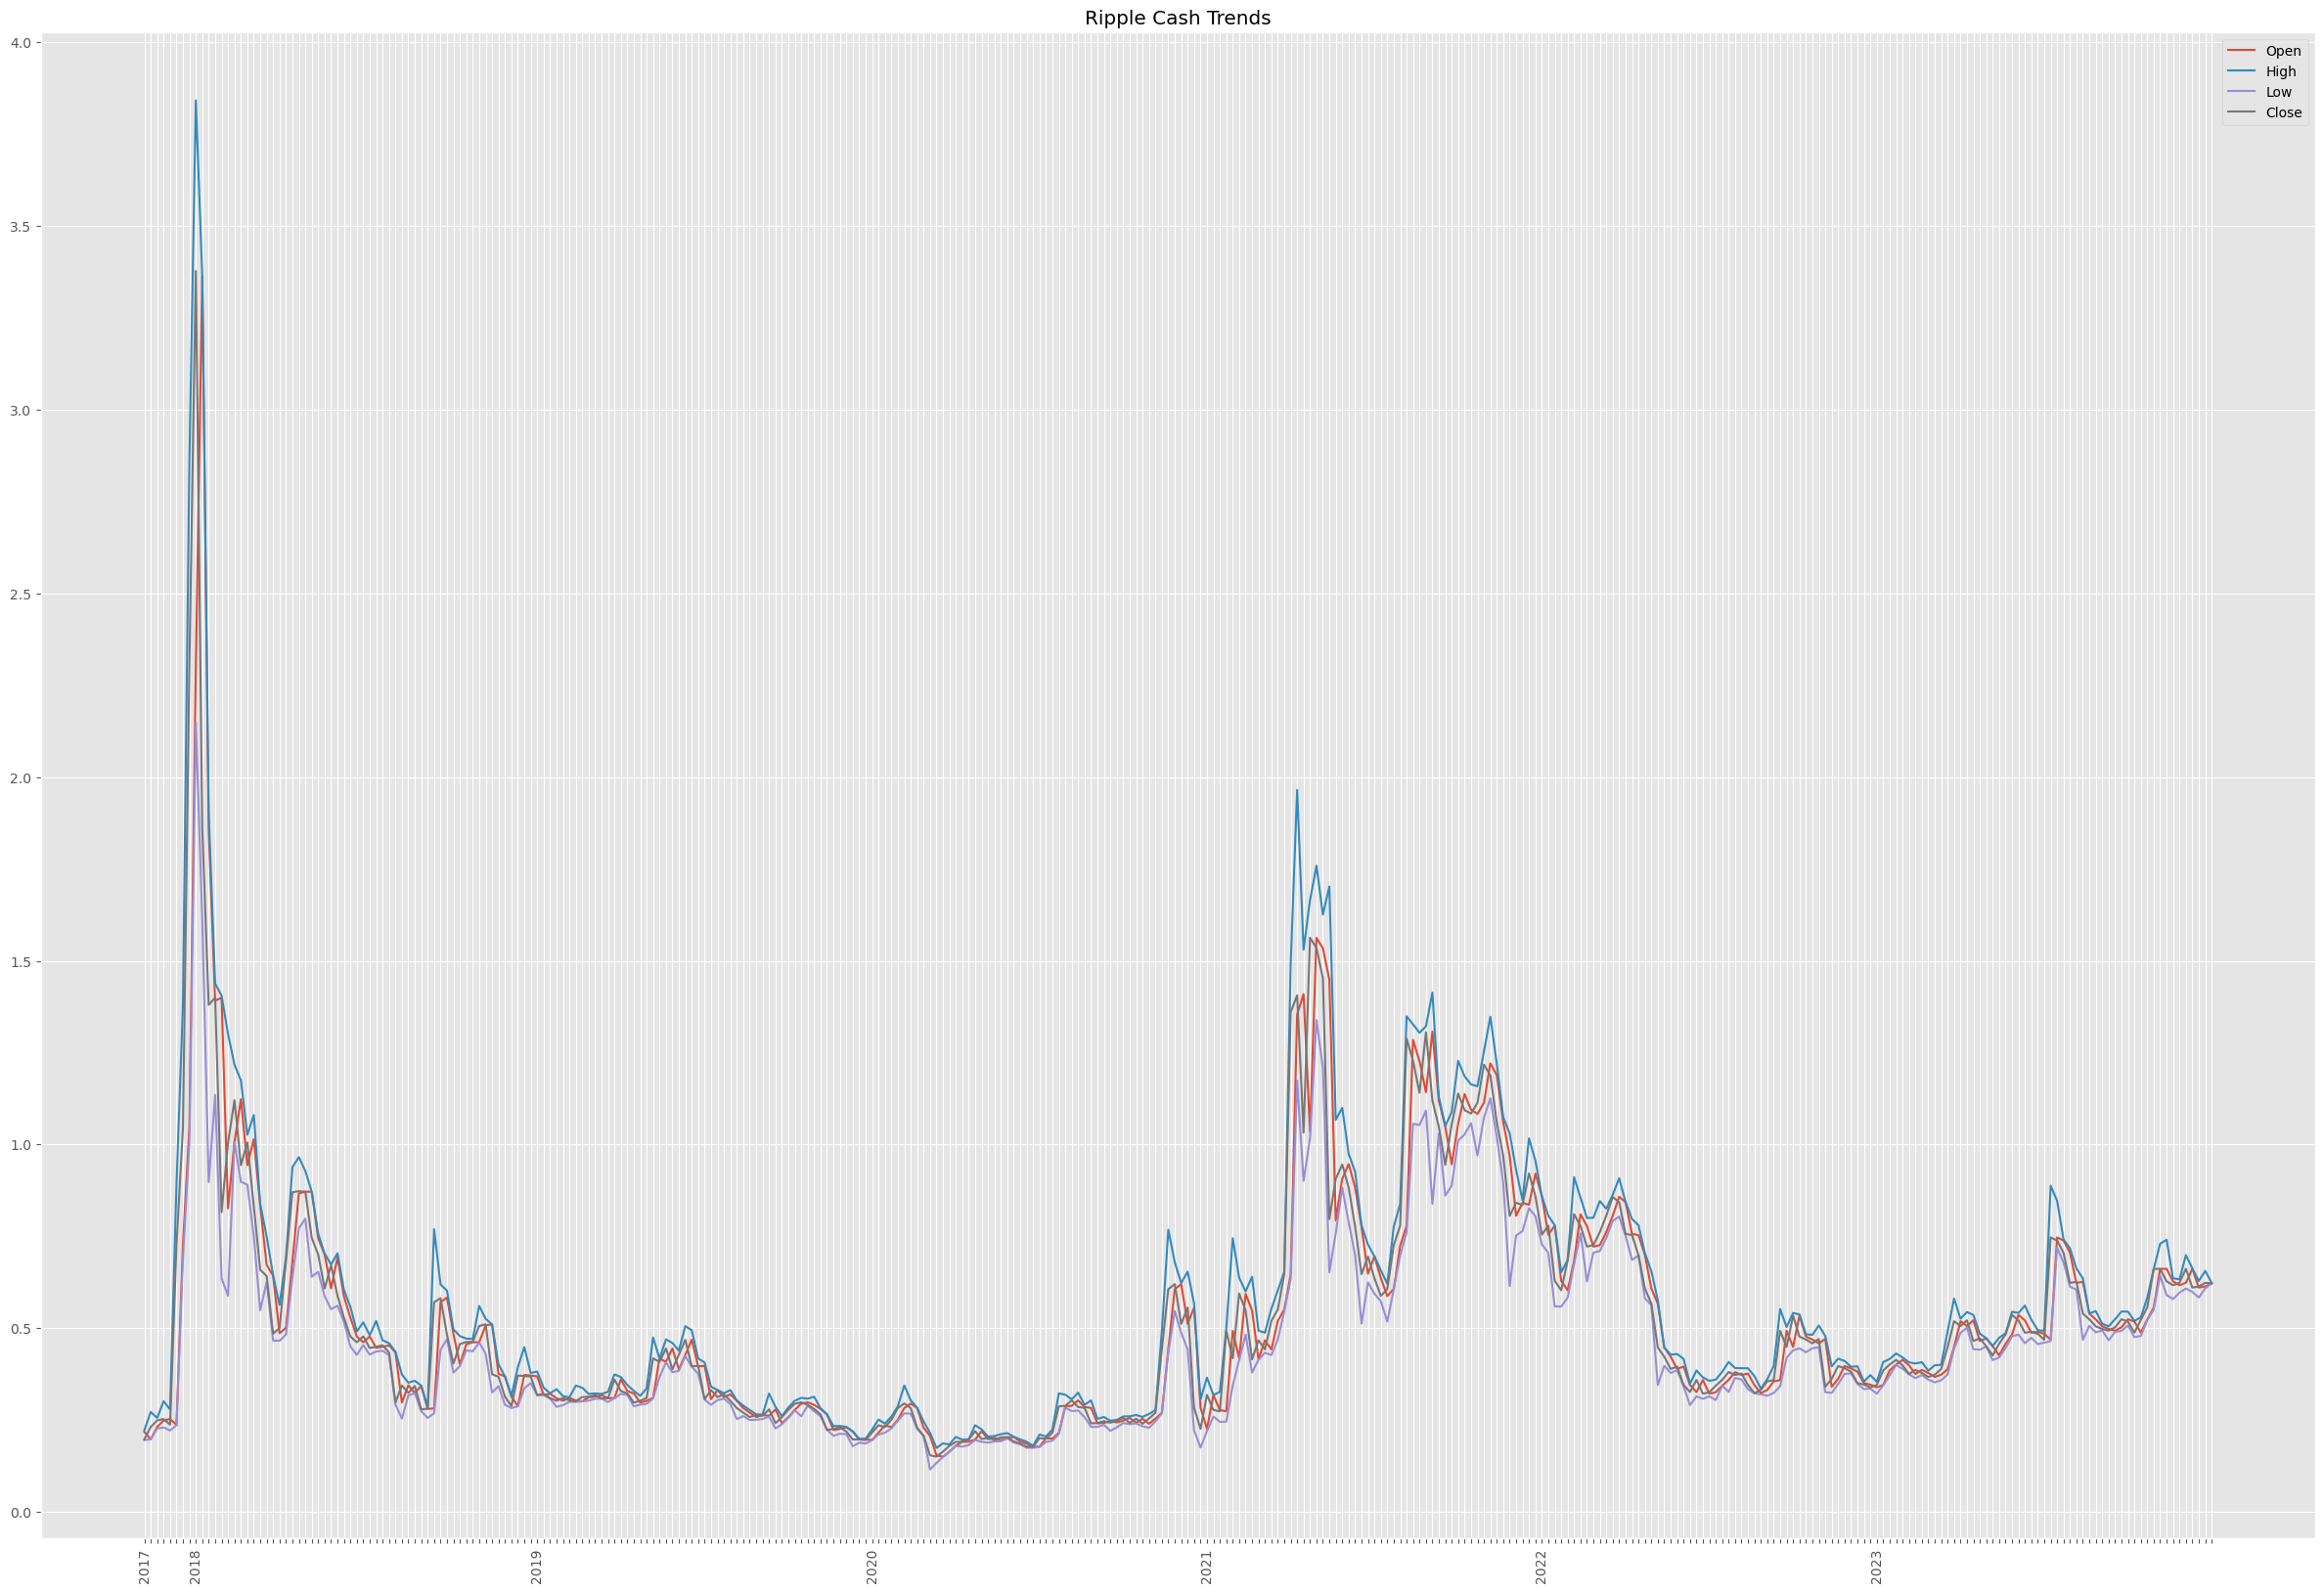

In [271]:
plt.figure(figsize=[30,20])
plt.plot(xrp['Date'],xrp['Open'])
plt.plot(xrp['Date'],xrp['High'])
plt.plot(xrp['Date'],xrp['Low'])
plt.plot(xrp['Date'],xrp['Close'])
plt.xticks(xrp['Date'], date, rotation='vertical')
plt.legend(['Open','High','Low','Close'])
plt.title('Ripple Cash Trends')